<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [337]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
 
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

#Importing Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [338]:
#Loading in the Sat Scores into a raw string by reading with open.
sat_scores_file = 'sat_scores.csv'
with open(sat_scores_file, 'r') as f:
    raw_pd = f.read()
    
lists = raw_pd.split('\n')

data = []

for rows in lists:
    seperated_items = rows.split(',')
    row_data = []
    for item in seperated_items:
        if item.isdigit() == True:
            row_data.append((int(item)))
        else:
            row_data.append(item)
    data.append(row_data)

In [339]:
headers = data[0:][0]
data_values = data[1:]
data_values = data_values[:len(data_values)-2]

In [340]:
data_dictionary = {}


for index, column in enumerate(headers):
    column_data = []
    for col_data in data_values:
        column_data.append(col_data[index])
    data_dictionary[column] = column_data

data_dictionary

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS'],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  561,
  580,
  577

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [341]:
df_1 = pd.read_csv('sat_scores.csv')

In [342]:
df_2 = pd.DataFrame(data_dictionary)

In [343]:
df_2

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [344]:
df_1.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [345]:
df_2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

## If I have hadn't converted the strs to integers (int) from the raw csv string, all of the integers would have been an object type in Pandas.


### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [346]:
df_1.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [348]:
df_1.sort_values(by='Math', ascending=False)

,State,Rate,Verbal,Math
47,IA,5,593,603
49,ND,4,592,599
44,WI,6,584,596
37,MN,9,580,589
33,IL,12,576,589
48,SD,4,577,582
38,KS,9,577,580
42,MO,8,577,577
36,MI,11,561,572
46,UT,5,575,570


Our data shows us some discrete categorical values (State) and the associated pass rate with verbal and math scores. CT, NJ and MA have the highest pass rates. The verbal scores are highest in NH and the math scores are highest in IA.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [77]:
data_dict = df_1.to_dict()

In [78]:
data_dict['State']

{0: 'CT',
 1: 'NJ',
 2: 'MA',
 3: 'NY',
 4: 'NH',
 5: 'RI',
 6: 'PA',
 7: 'VT',
 8: 'ME',
 9: 'VA',
 10: 'DE',
 11: 'MD',
 12: 'NC',
 13: 'GA',
 14: 'IN',
 15: 'SC',
 16: 'DC',
 17: 'OR',
 18: 'FL',
 19: 'WA',
 20: 'TX',
 21: 'HI',
 22: 'AK',
 23: 'CA',
 24: 'AZ',
 25: 'NV',
 26: 'CO',
 27: 'OH',
 28: 'MT',
 29: 'WV',
 30: 'ID',
 31: 'TN',
 32: 'NM',
 33: 'IL',
 34: 'KY',
 35: 'WY',
 36: 'MI',
 37: 'MN',
 38: 'KS',
 39: 'AL',
 40: 'NE',
 41: 'OK',
 42: 'MO',
 43: 'LA',
 44: 'WI',
 45: 'AR',
 46: 'UT',
 47: 'IA',
 48: 'SD',
 49: 'ND',
 50: 'MS',
 51: 'All'}

In [349]:
data_dict_2 = {
    'State': {'Description_of_Variable': 'The US State, all other variables have been aggregated by this metric.', 'Data_Type' : 'Categorical, Discrete Data', 'Shape': np.shape(np.array(list(data_dict['State'])))},
    'Rate': {'Description_of_Variable': 'A % Pass Rate', 'Data_Type' : 'Integer', 'Shape': np.shape(np.array(list(data_dict['Rate']))) },
    'Verbal': {'Description_of_Variable': 'Verbal Scores in SAT Tests', 'Data_Type' : 'Continuous Data', 'Shape': np.shape(np.array(list(data_dict['Verbal'])))},
    'Math': {'Description_of_Variable': 'Mathematical Scores in SAT Tests', 'Data_Type' : 'Integer', 'Shape': np.shape(np.array(list(data_dict['Math'])))},
}
pd.DataFrame(data_dict_2).T



,Data_Type,Description_of_Variable,Shape
State,"Categorical, Discrete Data","The US State, all other variables have been ag...","(52,)"
Rate,Integer,A % Pass Rate,"(52,)"
Verbal,Continuous Data,Verbal Scores in SAT Tests,"(52,)"
Math,Integer,Mathematical Scores in SAT Tests,"(52,)"


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [350]:
Rate = [value for key, value in data_dict['Rate'].items()]
Math = [value for key, value in data_dict['Math'].items()]
Verbal = [value for key, value in data_dict['Verbal'].items()]

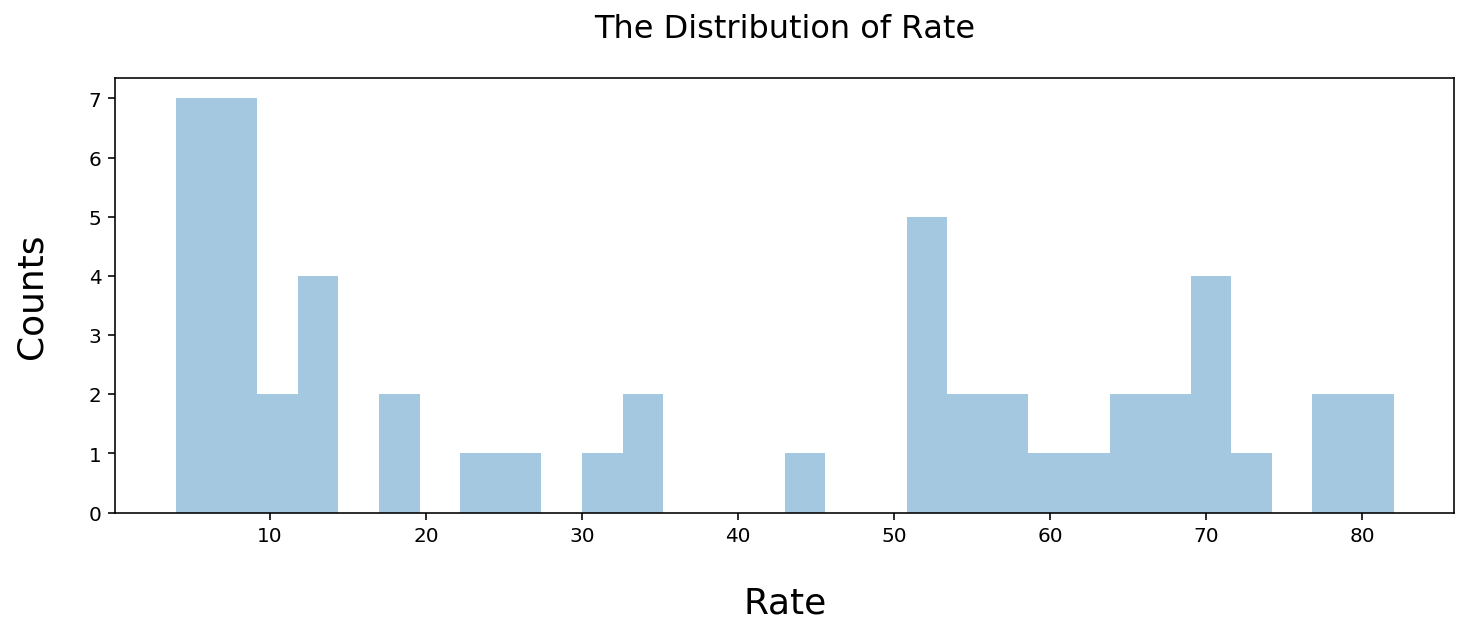

In [351]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.distplot(Rate, kde=False, bins=30)
ax.set_title('The Distribution of Rate', fontsize=16, pad=20)
plt.xlabel('Rate', fontsize='18', labelpad=20)
plt.ylabel('Counts', fontsize='18', labelpad=20)
plt.show()

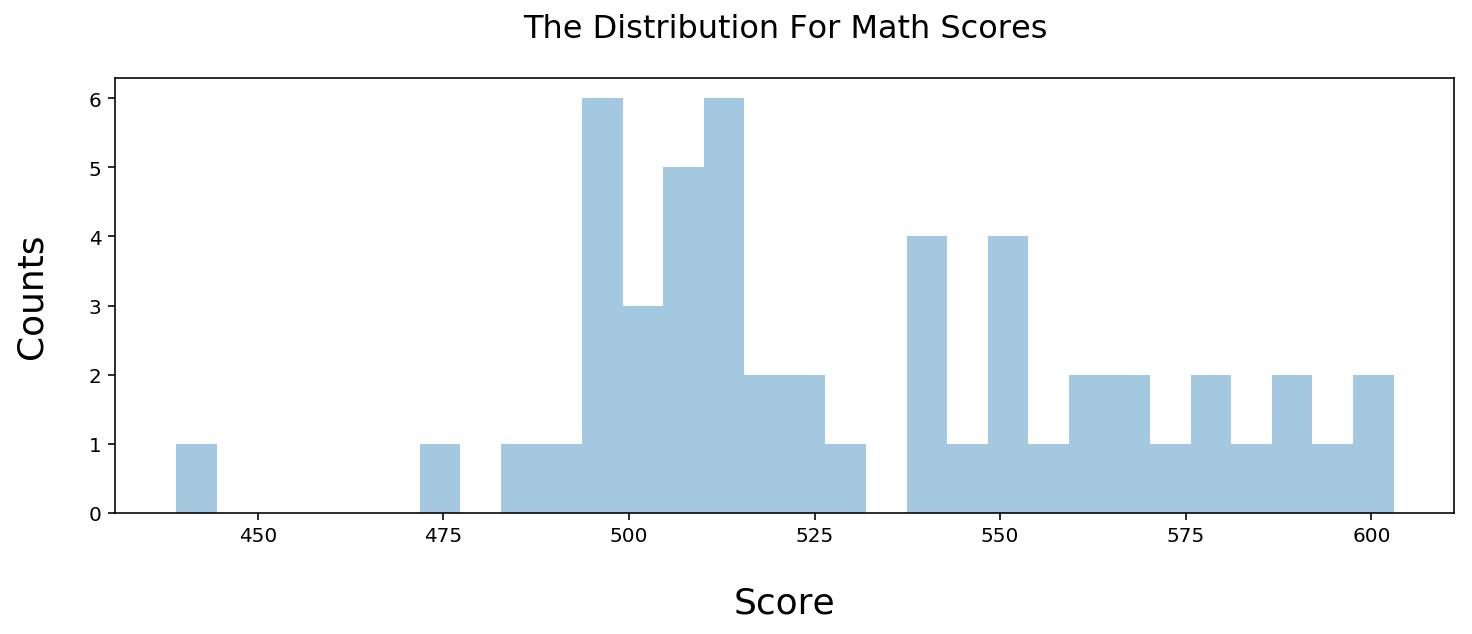

In [352]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.distplot(Math, kde=False, bins=30)
ax.set_title('The Distribution For Math Scores', fontsize=16, pad=20)
plt.xlabel('Score', fontsize='18', labelpad=20)
plt.ylabel('Counts', fontsize='18', labelpad=20)
plt.show()

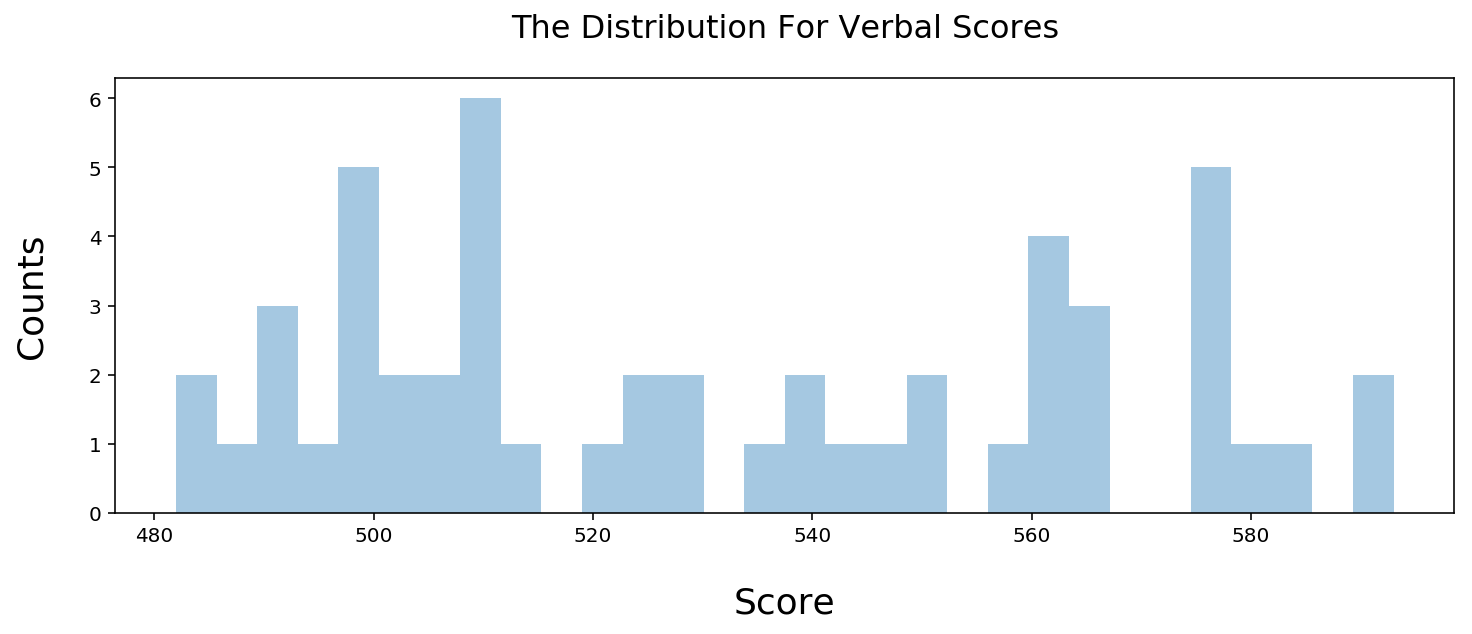

In [353]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.distplot(Verbal, kde=False, bins=30)
ax.set_title('The Distribution For Verbal Scores', fontsize=16, pad=20)
plt.xlabel('Score', fontsize='18', labelpad=20)
plt.ylabel('Counts', fontsize='18', labelpad=20)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

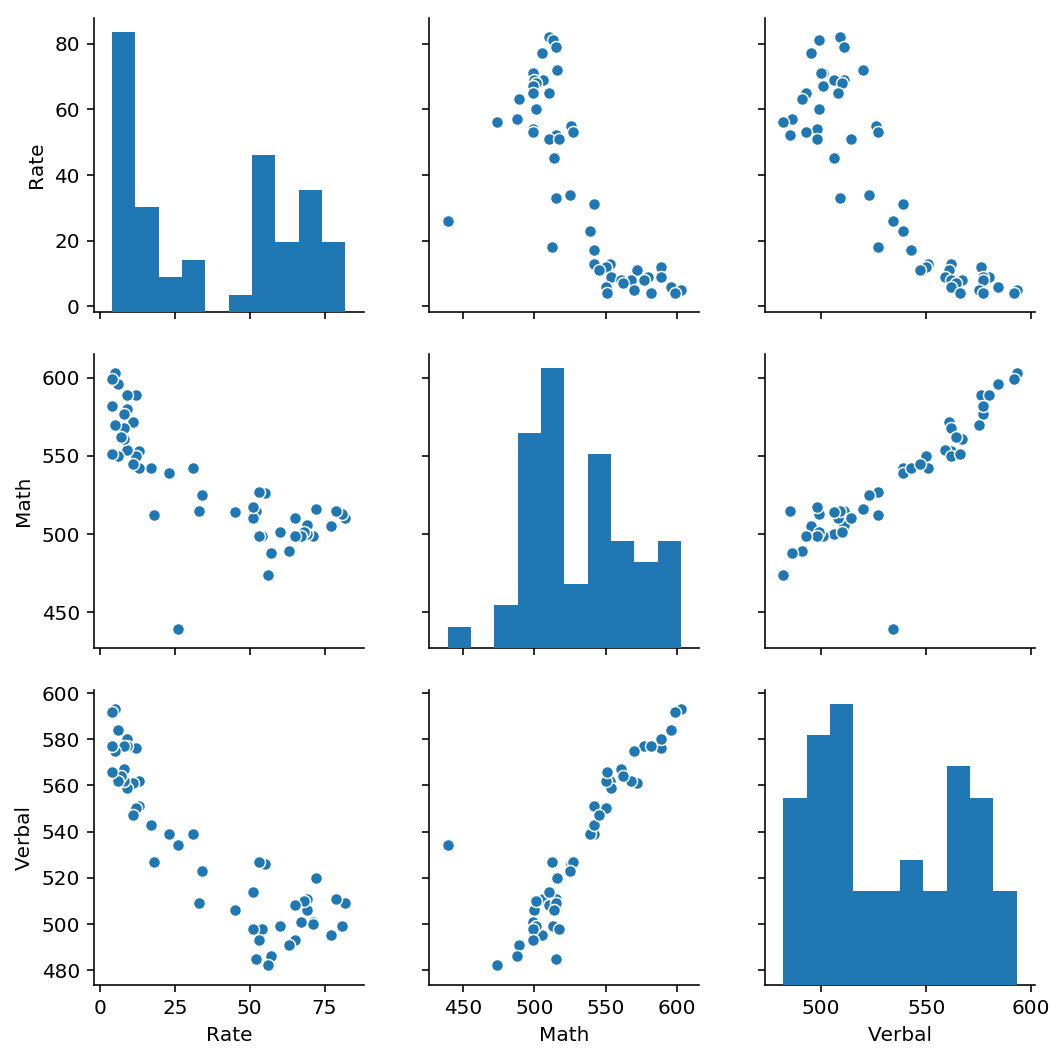

In [354]:
sns.pairplot(data=df_1, vars=["Rate","Math","Verbal"])
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

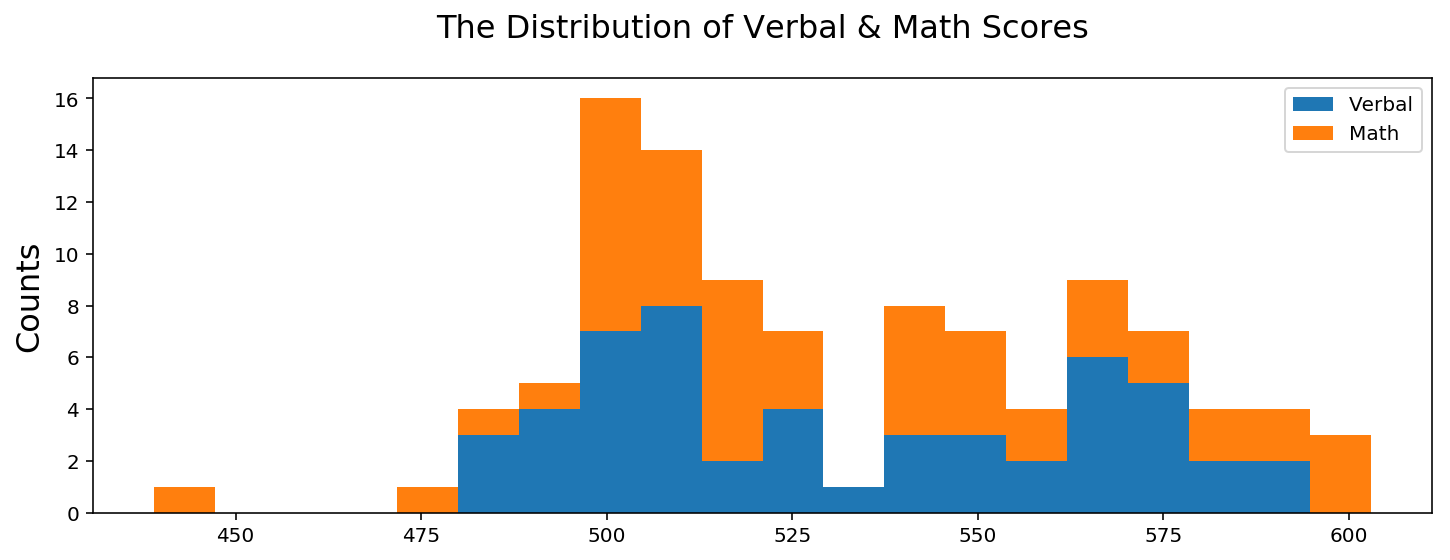

In [356]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title('The Distribution of Verbal & Math Scores', fontsize=16, pad=20)
plt.hist([df_1['Verbal'], df_1['Math']], bins=20, stacked=True, align='mid')
# plt.hist([df_1['Verbal'], df_1['Math']], bins=20, stacked=True, align='mid')
plt.legend(['Verbal', 'Math'])
plt.ylabel('Counts', fontsize=16)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

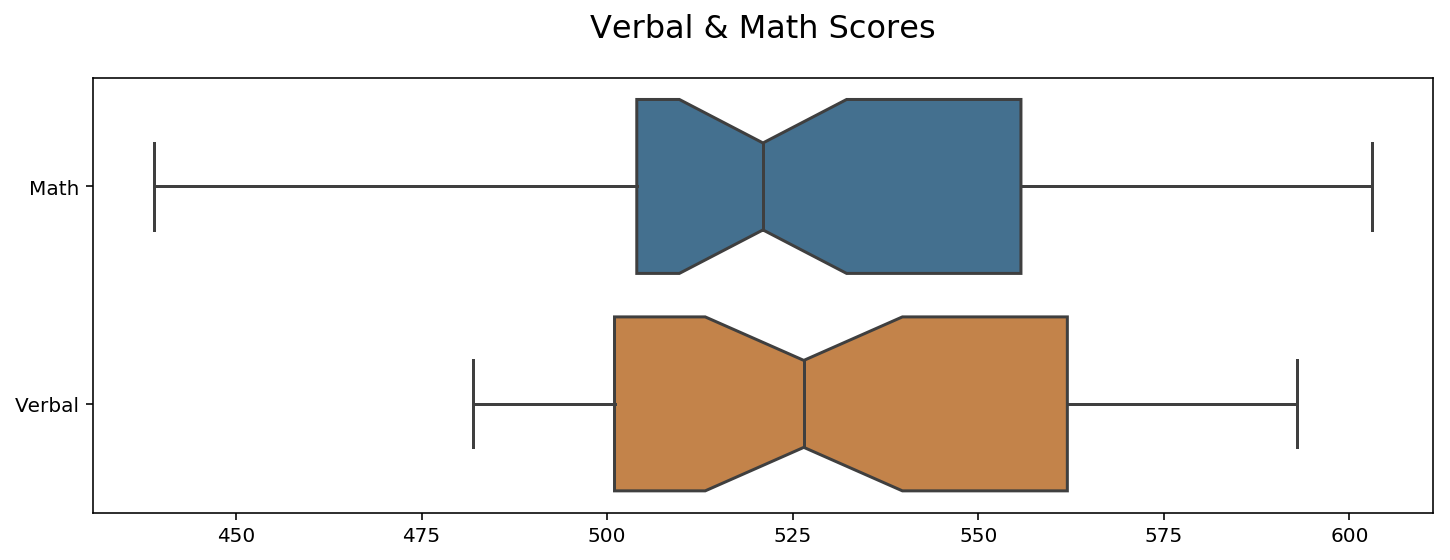

In [357]:
mask = df_1[['Math', 'Verbal']]
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title('Verbal & Math Scores', fontsize=16, pad=20)
sns.boxplot(data=mask, orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax, whis=1.5)

plt.show()

1. The benefits of using a boxplot are that we can see the quartiles (25%,50% - median and 75%), additionally we can see where the IQR sits in relation to the start range or end range of the data set. Furthermore it allows us to easily spot outliers from this range.
2. What's wrong with plotting a box-plot on rate is that math and verbal have specific unit types and rate might be of a different unit type. This means that the data would be hard to compare, unless we 'standardised the data'.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


## One Solution would be to great a function for standardising the data.

In [88]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [89]:
math_stand = var_standardized(df_1.Math)
verbal_stand = var_standardized(df_1.Verbal)
rate_stand = var_standardized(df_1.Rate)

print("Mean: ", rate_stand.mean(), ", Standard deviation: ", rate_stand.std())

Mean:  2.1670699422971805e-16 , Standard deviation:  0.9999999999999997


## However it's possible to skip this step and just simply standardise a subset of the entire dataframe.

In [90]:
stand_df = (df_1[['Rate','Verbal','Math']] - df_1[['Rate','Verbal','Math']].mean()) / df_1[['Rate','Verbal','Math']].std()

In [91]:
mask_two = stand_df[['Rate', 'Verbal', 'Math']]

In [92]:
math_standard_variable = stand_df[['Math']]
verbal_standard_variable = stand_df[['Rate']]
rate_standard_variable = stand_df[['Verbal']]

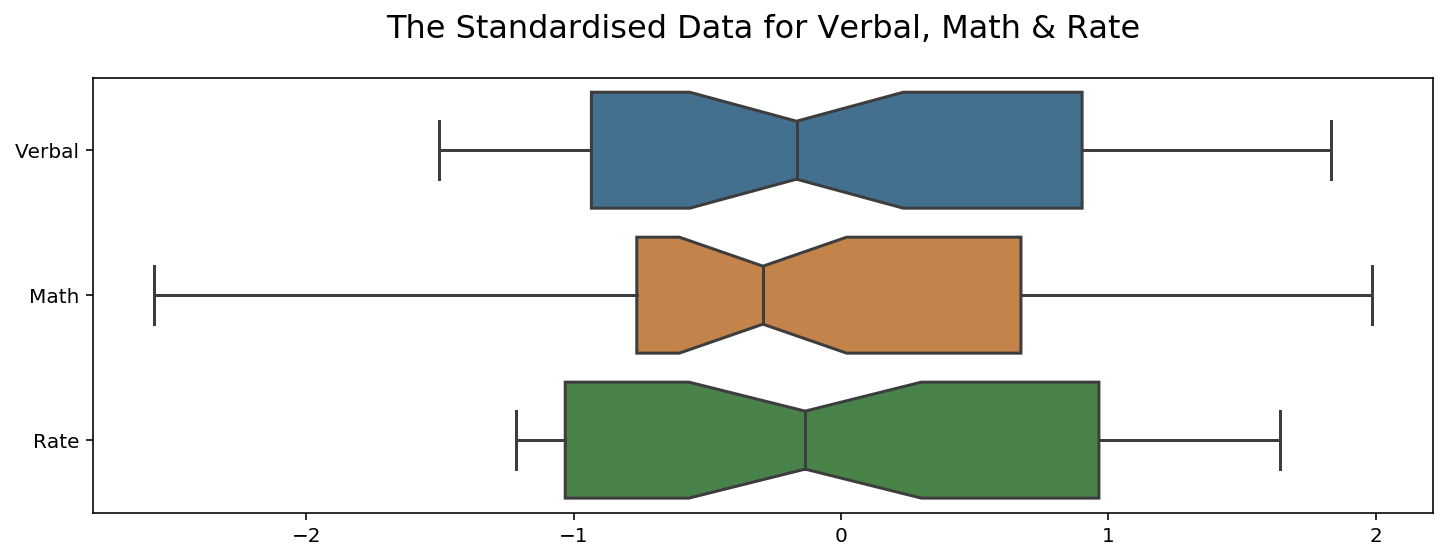

In [93]:
fig, ax = plt.subplots(figsize=(12, 4))

sns.boxplot(data=stand_df[['Verbal','Math', 'Rate']], orient='h',
            fliersize=8, linewidth=1.5, notch=True,
            saturation=0.5, ax=ax, whis=1.5)

ax.set_title('The Standardised Data for Verbal, Math & Rate', fontsize=16, pad=20)

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [94]:
verbal_mean = df_1['Verbal'].mean()

In [95]:
verbal_mean

532.0192307692307

In [96]:
mask_three = df_1['Verbal'] > verbal_mean

In [358]:
df_1[mask_three]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [97]:
df_1[mask_three].count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

In [98]:
df_1.count()

State     52
Rate      52
Verbal    52
Math      52
dtype: int64

- This tells us that 24 out of 52 data points are larger than the mean (46%).

In [99]:
24/52*100

46.15384615384615

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [359]:
avg_verbal_median = df_1['Verbal'].median()

In [360]:
avg_verbal_median

526.5

In [361]:
mask_four = df_1['Verbal'] > avg_verbal_median

In [362]:
df_1[mask_four].head(5)

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512


In [104]:
df_1[mask_four].count()

State     26
Rate      26
Verbal    26
Math      26
dtype: int64

The median is larger than the mean (26 vs 24), therefore the data is slightly skewed to the left.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [363]:
df_1['Verbal_Minus_Math'] = df_1['Verbal'] - df_1['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [364]:
df_2 = pd.DataFrame(df_1.sort_values(by='Verbal_Minus_Math', ascending=False)).head(10)

In [365]:
df_2.head(3)

,State,Rate,Verbal,Math,Verbal_Minus_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [366]:
df_3 = pd.DataFrame(df_1.sort_values(by='Verbal_Minus_Math', ascending=True)).head(10)

In [367]:
df_3.head(3)

,State,Rate,Verbal,Math,Verbal_Minus_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [368]:
round(df_1.corr(), 2)

,Rate,Verbal,Math,Verbal_Minus_Math
Rate,1.00,-0.89,-0.77,-0.10
Verbal,-0.89,1.00,0.90,0.05
Math,-0.77,0.90,1.00,-0.39
Verbal_Minus_Math,-0.10,0.05,-0.39,1.00


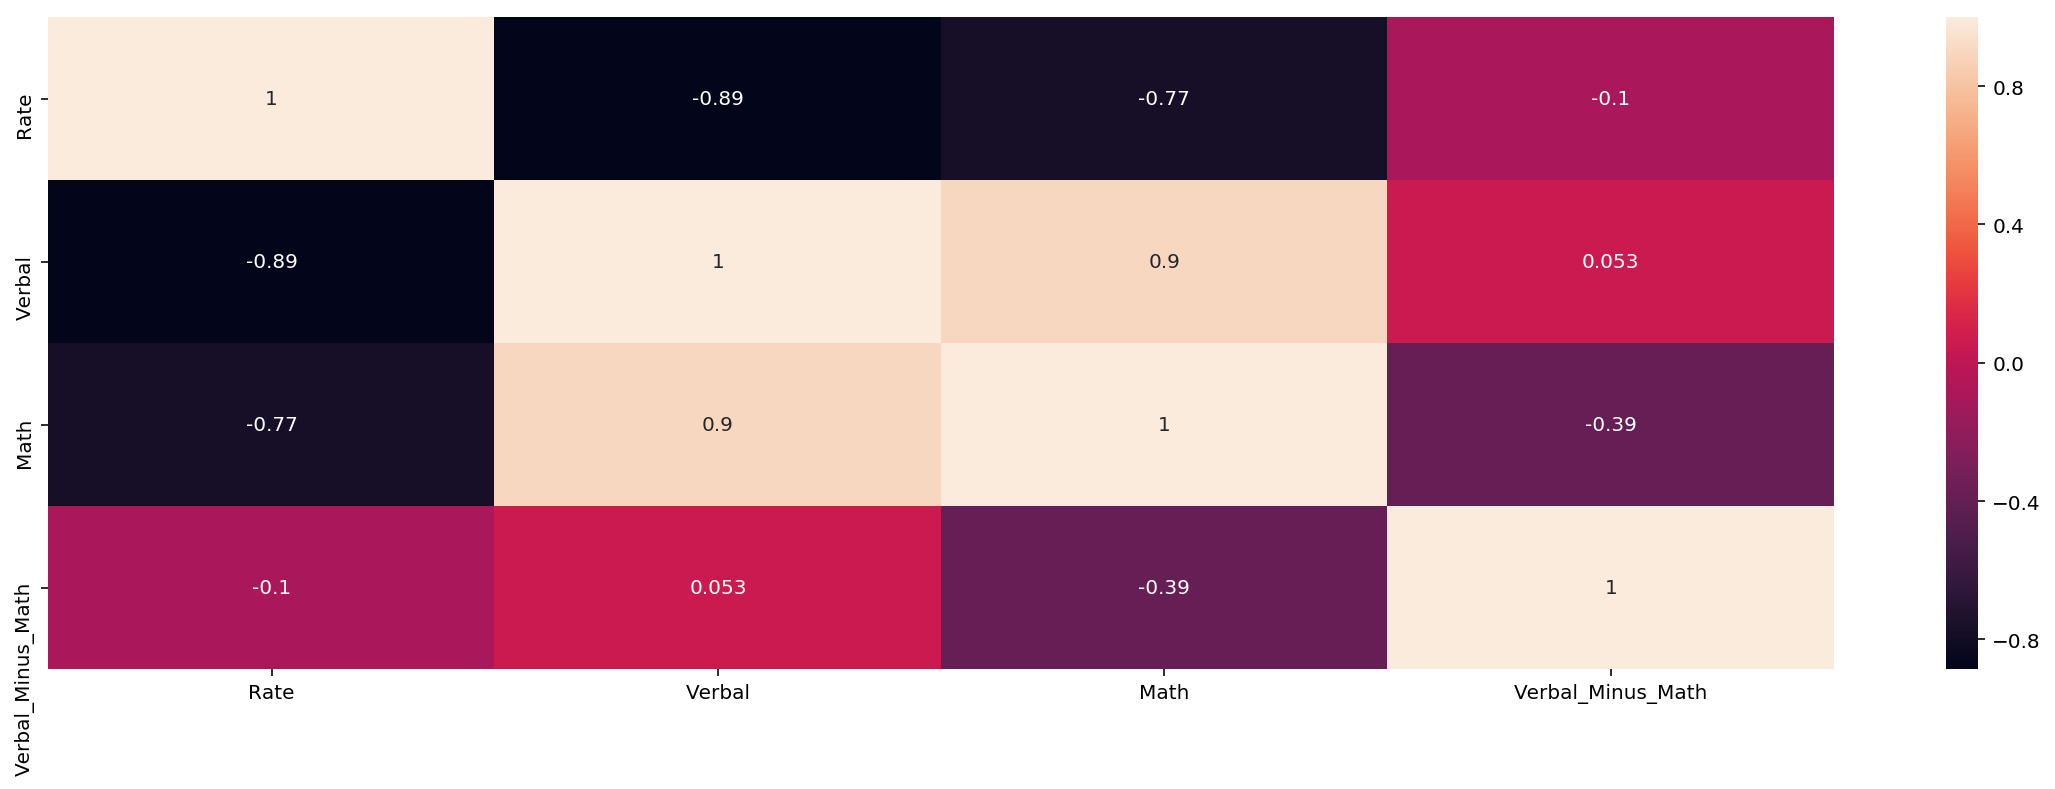

In [369]:
plt.figure(figsize=(20,6))
sns.heatmap(df_1.corr(), annot=True)
plt.show()

The correlation matrix, uses pearsons's correlation equation to calculate the positive or negative relationships between two variables. The value can range from - 1 to 1 (negatively correlated to positively correlated).

In this example we can see that verbal and math scores are strongly positively correlated: 0.89. Also the pass rate is negatively correlated against verbal and math scores: -0.89 and 0.77.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [370]:
df_1.describe()

,Rate,Verbal,Math,Verbal_Minus_Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


- Count: The count shows us the number of rows for every column, it's useful for spotting if there are missing values among rows. Also it helps us to understand the size of the dataset and to see if there are any missing rows for individual columns.
- Mean: The mean is the sum of all of the counts / n (n = the number of items).
- Std: Standard deviation shows us how dispersed the data is from the mean.
- Min: This is the minimum value within the column.
- 25%: This quartile splits off the lowest 25% of data from the highest 75%.
- 50%: 50% represents the middle value / point within the data (i.e. the median).
- 75%: This quartile splits off the highest 25% of data from the lowest 75%.
- Max: Max represents the maximum value for a given dataset.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [371]:
df_1.cov()

,Rate,Verbal,Math,Verbal_Minus_Math
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Verbal_Minus_Math,-43.552036,27.499623,-219.931373,247.430995


Covariance indicates the direction of linear variables, whilst correlation measures both the strength and direction of the linear relationship between both variables. Also correlation values are standardized whilst covariance values are not.

The process to convert the covariance into the correlation is by dividing the covariance of two variables by the product of their standard deviations.

The correlation matrix is preferred because the value of covariance is affected by the change of scales between the measured variables. In constrast, the correlation matrix is a unit free measure, this is due to dividing the value of covariance by the product of both standard deviations which have the same units.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [372]:
new_df = pd.read_csv('drug-use-by-age.csv')



#1. Do an initial check on the data with .info(), .describe() and .dtypes() to see if there are any missing values, null values or incorrect data types.

In [373]:
new_df.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [374]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [375]:
new_df.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [376]:
new_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### There are 7 object columns within this panda dataframe series. These are the frequency columns and the values are '-'. Therefore let's clean these values with applymap and apply 'Nan".

In [377]:
new_df = new_df.replace('-',np.NaN)

In [378]:
#Additional Methods For Cleaning Incorrect Data Values.

In [379]:
#1.  def cleaning_data(x):
#     if x == '-':
#         x = 'nan'
#     else:
#         return x

In [380]:
# new_df.applymap(cleaning_data)

In [381]:
#This method allows us to extract all of the different data types for every single column.
dtypeCount = [new_df.iloc[:,i].apply(type).value_counts() for i in range(new_df.shape[1])]

### On deeper investigation, we've found that there are <class 'str'> variables within 6 of our columns, this will affect our EDA as firstly we will need to spend more time cleaning the data. Additionally until the data is cleaned, we will not be able to use specific methods such as .mean() etc. on such columns.

In [382]:
dtypeCount

[<class 'str'>    17
 Name: age, dtype: int64, <class 'int'>    17
 Name: n, dtype: int64, <class 'float'>    17
 Name: alcohol-use, dtype: int64, <class 'float'>    17
 Name: alcohol-frequency, dtype: int64, <class 'float'>    17
 Name: marijuana-use, dtype: int64, <class 'float'>    17
 Name: marijuana-frequency, dtype: int64, <class 'float'>    17
 Name: cocaine-use, dtype: int64, <class 'str'>      16
 <class 'float'>     1
 Name: cocaine-frequency, dtype: int64, <class 'float'>    17
 Name: crack-use, dtype: int64, <class 'str'>      14
 <class 'float'>     3
 Name: crack-frequency, dtype: int64, <class 'float'>    17
 Name: heroin-use, dtype: int64, <class 'str'>      16
 <class 'float'>     1
 Name: heroin-frequency, dtype: int64, <class 'float'>    17
 Name: hallucinogen-use, dtype: int64, <class 'float'>    17
 Name: hallucinogen-frequency, dtype: int64, <class 'float'>    17
 Name: inhalant-use, dtype: int64, <class 'str'>      16
 <class 'float'>     1
 Name: inhalant-freque

In [383]:
def my_func(x):
    if type(x) != 'int' or type(x) != 'float':
        if (x) != 'nan':
            return float(x)

In [384]:
column_names = ['cocaine-frequency', 'crack-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency', 'heroin-frequency']
new_df[column_names] = new_df[column_names].applymap(my_func)

In [385]:
#Additional Method for Cleaning Data Types

# new_df['cocaine-use'] = new_df['cocaine-use'].astype('float')
# new_df['crack-use'] = new_df['crack-use'].astype('float')
# new_df['heroin-use'] = new_df['heroin-use'].astype('float')
# new_df['inhalant-use'] = new_df['inhalant-use'].astype('float')
# new_df['oxycontin-use'] = new_df['oxycontin-use'].astype('float')
# new_df['meth-use'] = new_df['meth-use'].astype('float')
# new_df['cocaine-frequency'] = new_df['cocaine-frequency'].astype('float')
# new_df['crack-frequency'] = new_df['crack-frequency'].astype('float')
# new_df['heroin-frequency'] = new_df['heroin-frequency'].astype('float')
# new_df['meth-frequency'] = new_df['meth-frequency'].astype('float')
# new_df['inhalant-frequency'] = new_df['inhalant-frequency'].astype('float')
# new_df['oxycontin-frequency'] = new_df['oxycontin-frequency'].astype('float')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [386]:
#Plotting a correlation matrix to explore the relationships between variables.

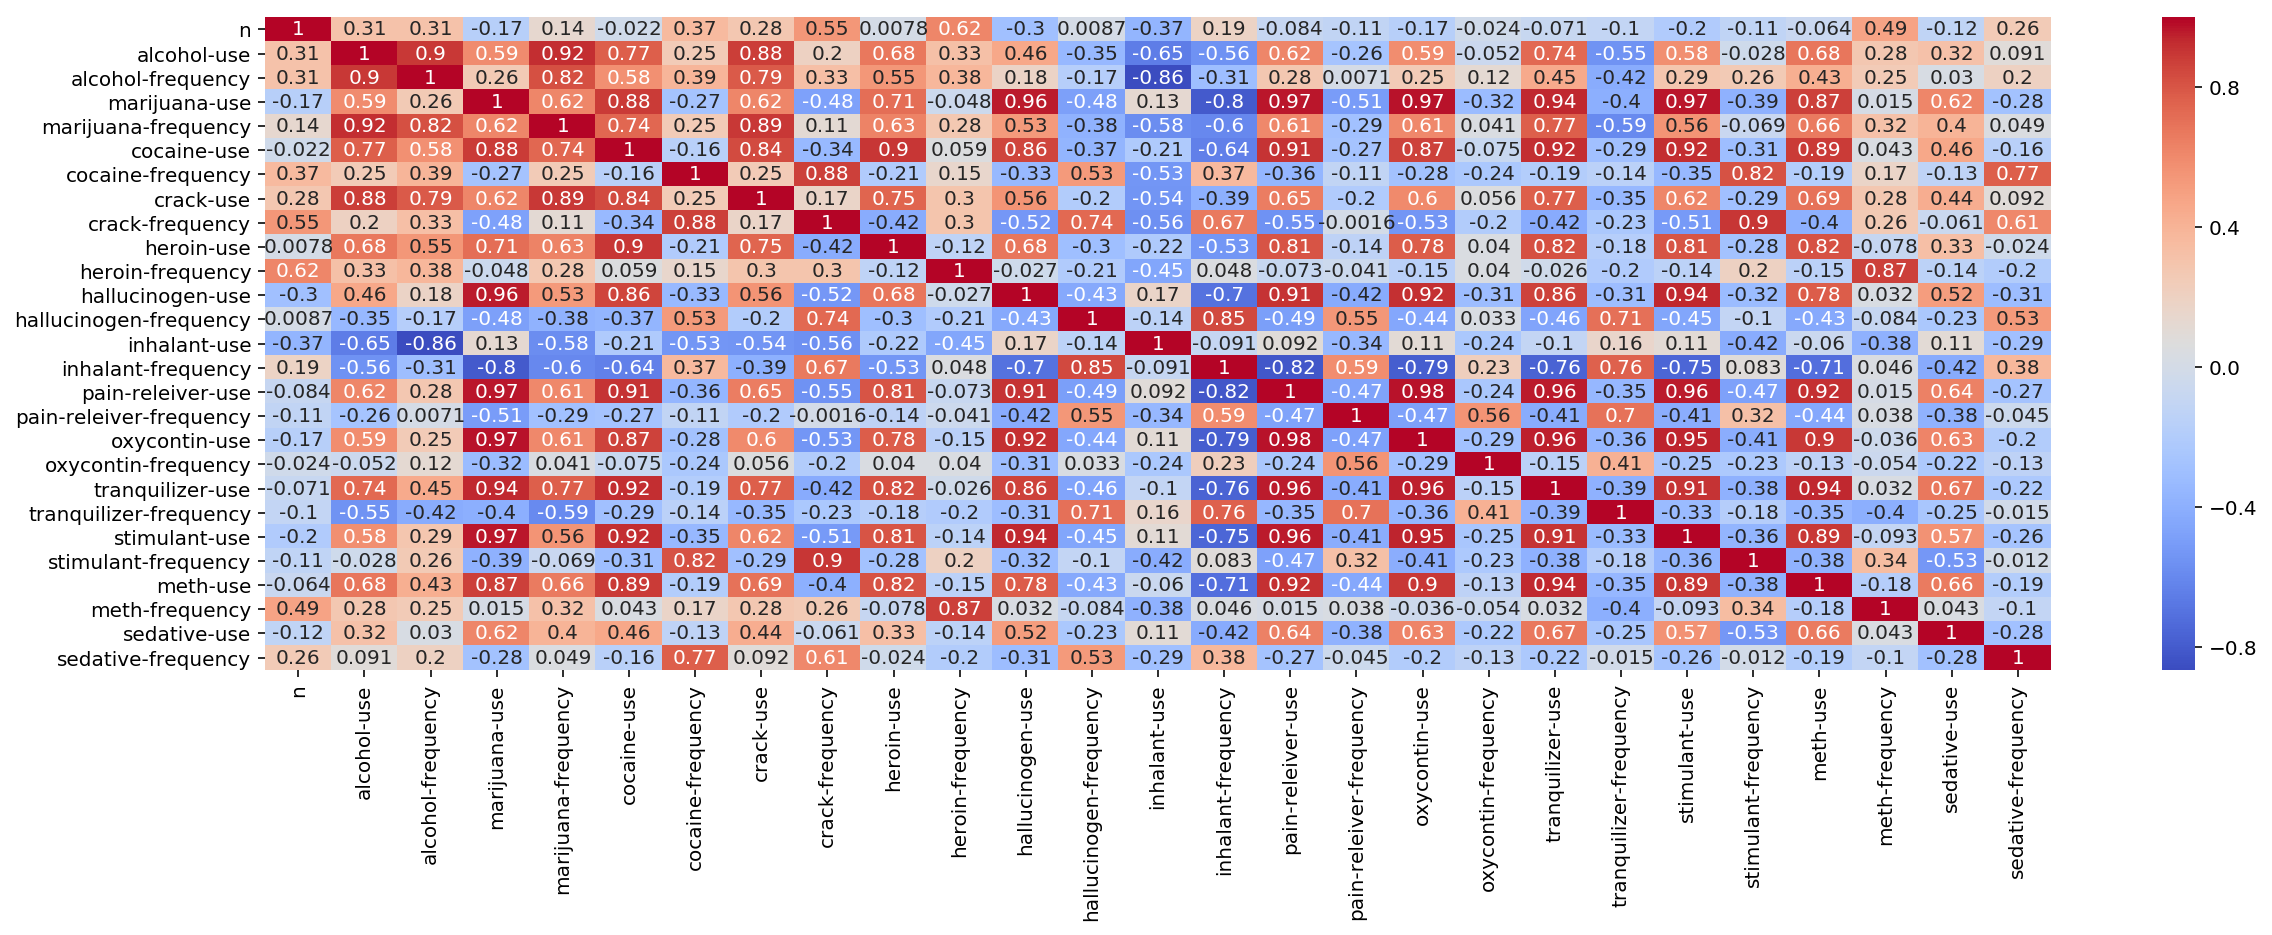

In [387]:
plt.figure(figsize=(20,6))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.show()

I've created a smaller heatmap that does the following:
- Excludes correlations that are 1.0 (in order to remove self correlations).
- Includes correlations that are greater than 0.75 or smaller than -0.75.

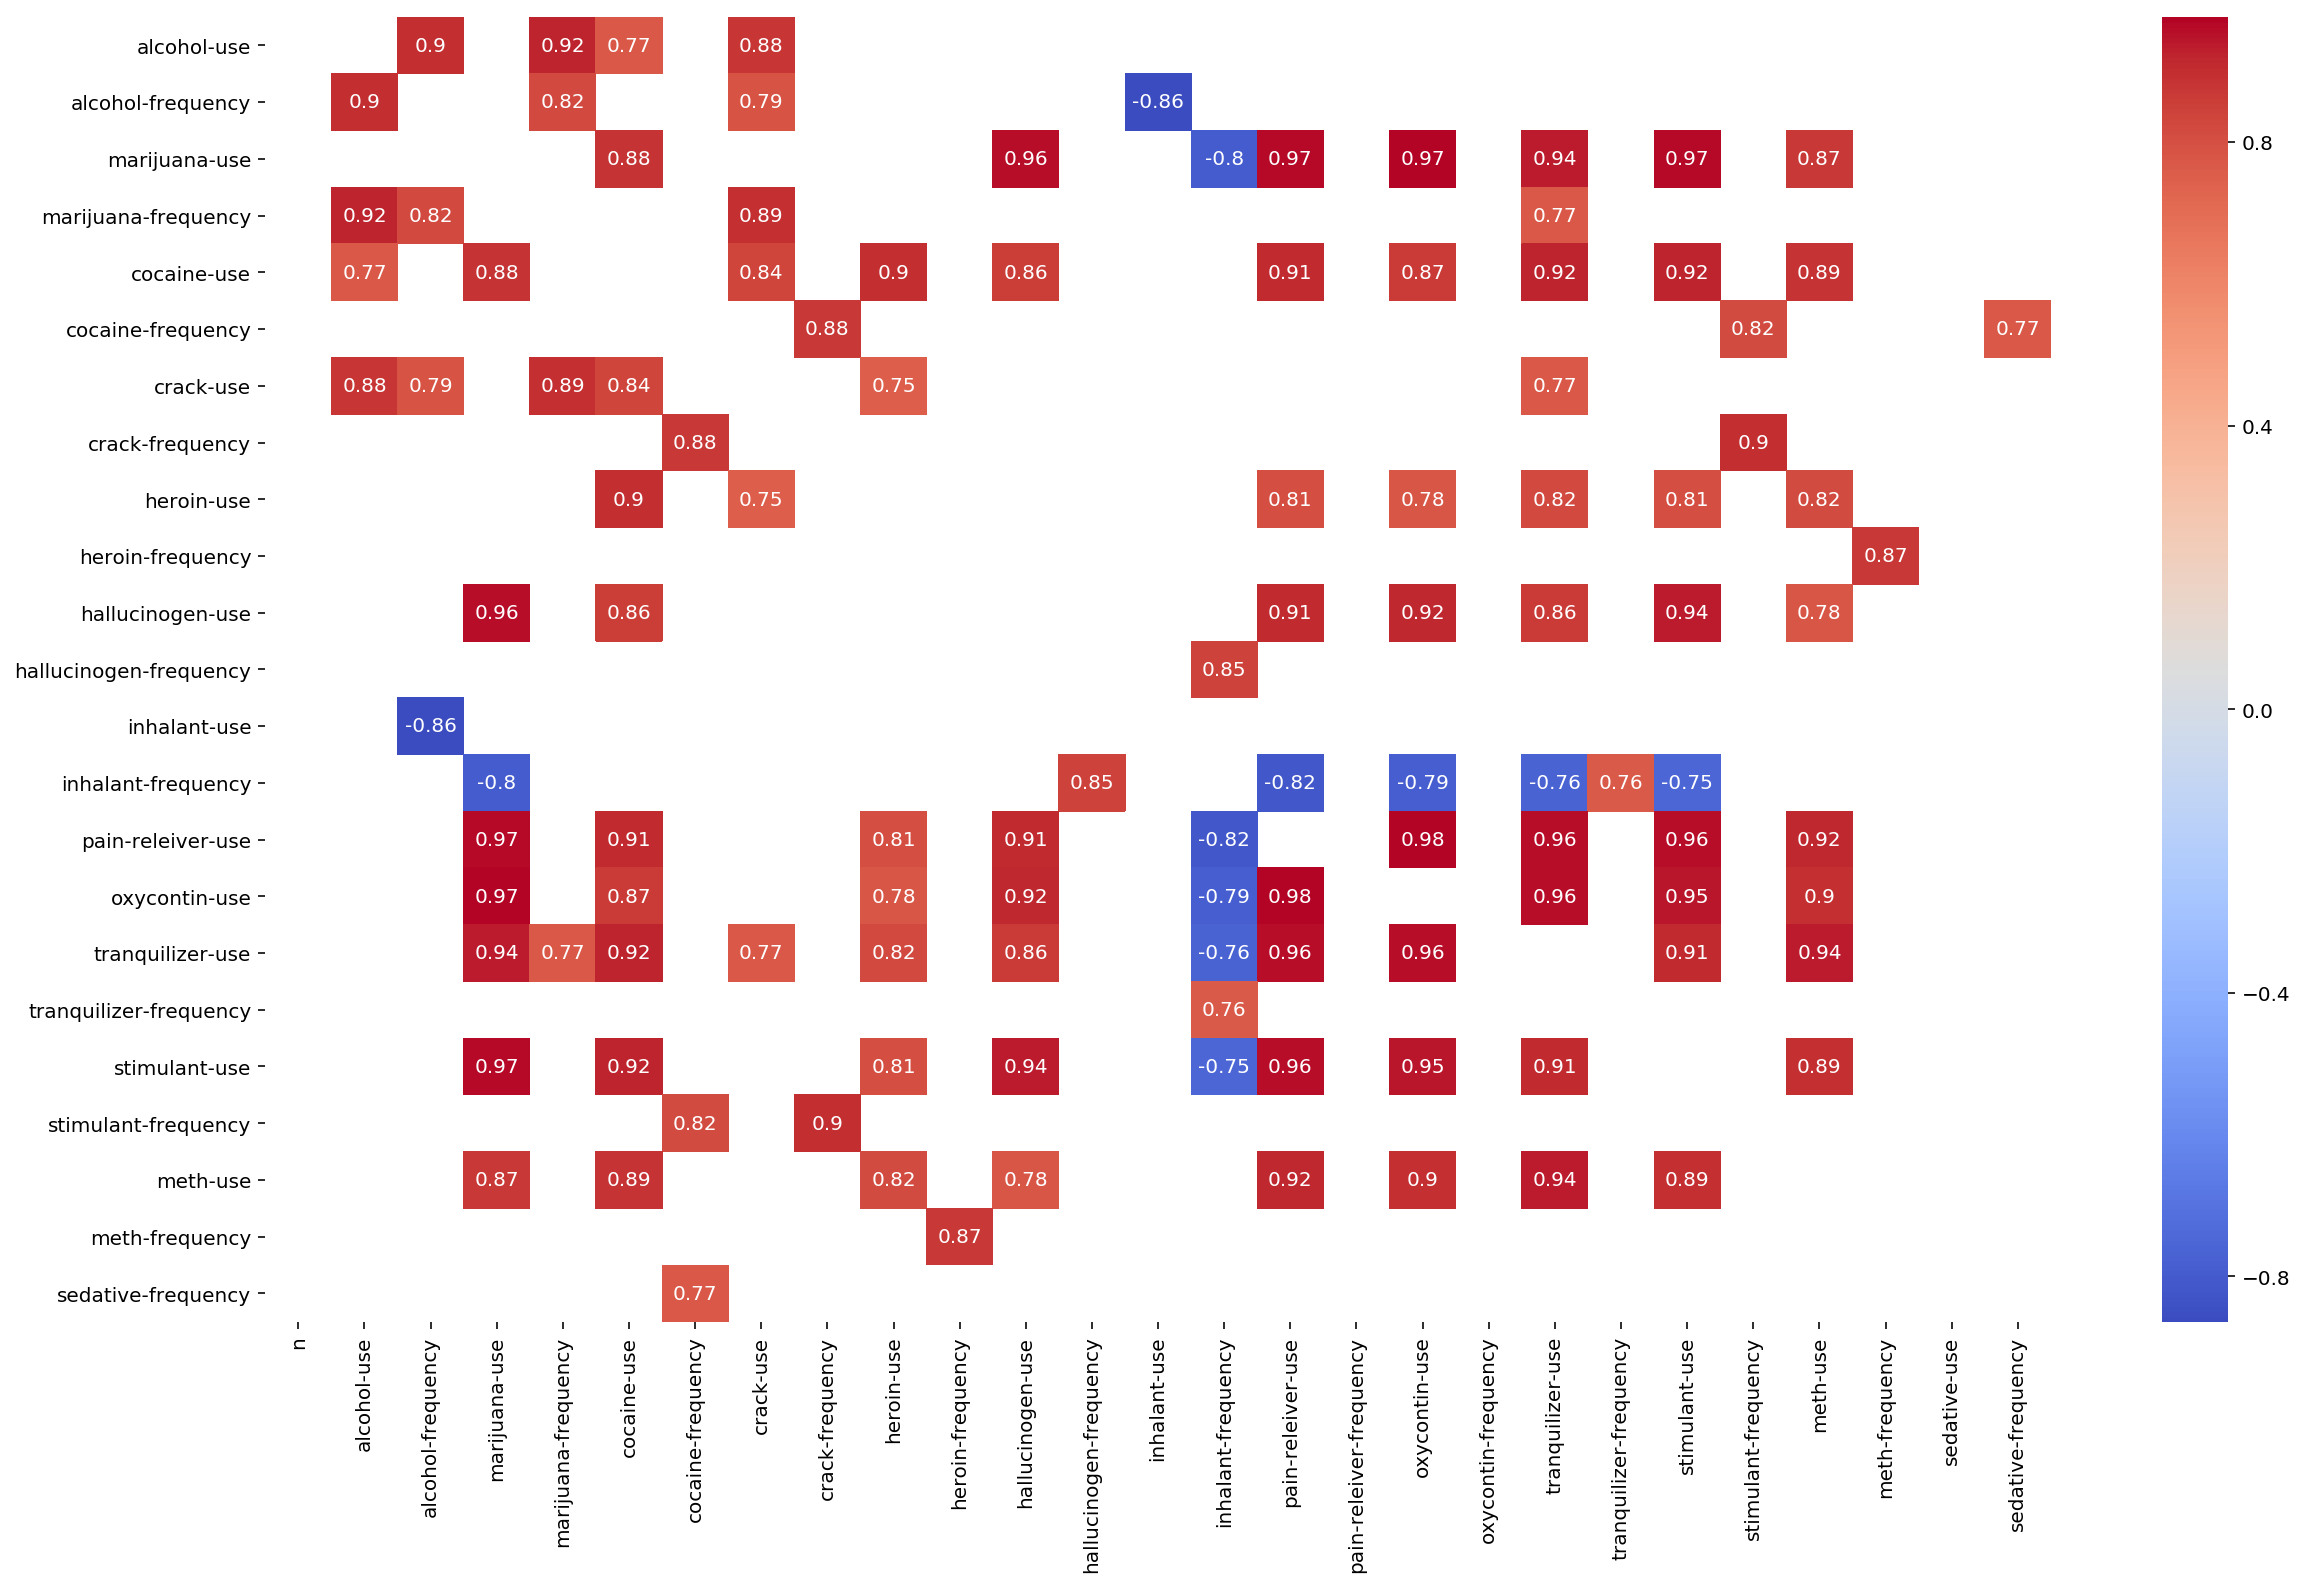

In [388]:
correlations = new_df.corr()[(new_df.corr() < 1.0) & (new_df.corr() > 0.75) | (new_df.corr() < -0.75)].dropna(how='all')
plt.figure(figsize=(20,12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', mask=correlations.isnull() )
plt.show()

In [389]:
#Creating a new Total Drug Usage feature.

new_df['Total_Drug_Usage'] = new_df['alcohol-frequency'] + new_df['marijuana-frequency']
+ new_df['cocaine-frequency'] + new_df['crack-frequency'] + new_df['heroin-frequency'] + new_df['inhalant-frequency'] 
+ new_df['pain-releiver-frequency'] + new_df['oxycontin-frequency'] + new_df['tranquilizer-frequency']
+ new_df['stimulant-frequency'] + new_df['meth-frequency'] + new_df['sedative-frequency']

0       NaN
1      28.0
2      52.5
3      46.5
4      48.5
5      63.5
6      30.0
7     117.0
8      28.0
9      21.0
10    108.0
11     48.5
12     41.0
13     76.0
14    138.0
15    158.0
16      NaN
dtype: float64

In [390]:
#Creating a Drug Usage % feature.

new_df['Drug_Usage_%'] = (new_df['Total_Drug_Usage'] / new_df['n'])

In [391]:
new_df.sort_values(by='Total_Drug_Usage', ascending=False).head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,Total_Drug_Usage,Drug_Usage_%
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0,124.0,0.043296
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5,112.0,0.024396
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,108.0,0.047556
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,104.0,0.044180
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0,104.0,0.026510


In [392]:
new_df.sort_values(by='Drug_Usage_%', ascending=False).head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,Total_Drug_Usage,Drug_Usage_%
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,108.0,0.047556
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,104.0,0.044180
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0,124.0,0.043296
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,96.0,0.043185
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0,104.0,0.039574


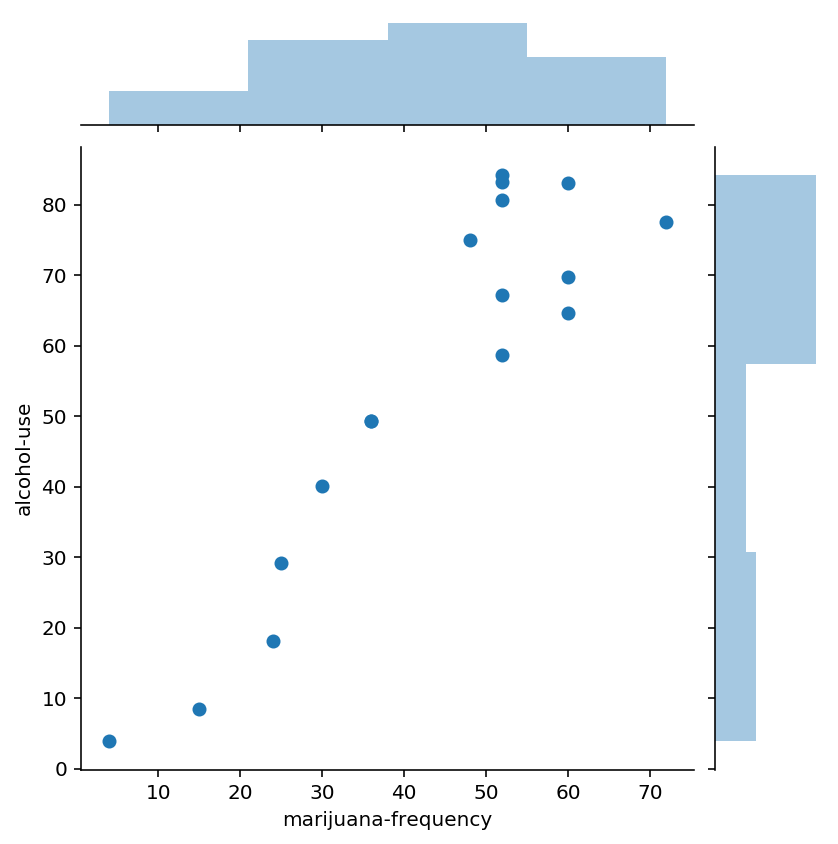

In [393]:
sns.jointplot(x=new_df['marijuana-frequency'], y= new_df['alcohol-use'])
plt.show()

In [394]:
exploration_df = new_df[['age','alcohol-use', 'crack-use', 'tranquilizer-use', 'marijuana-use', 'inhalant-use']]

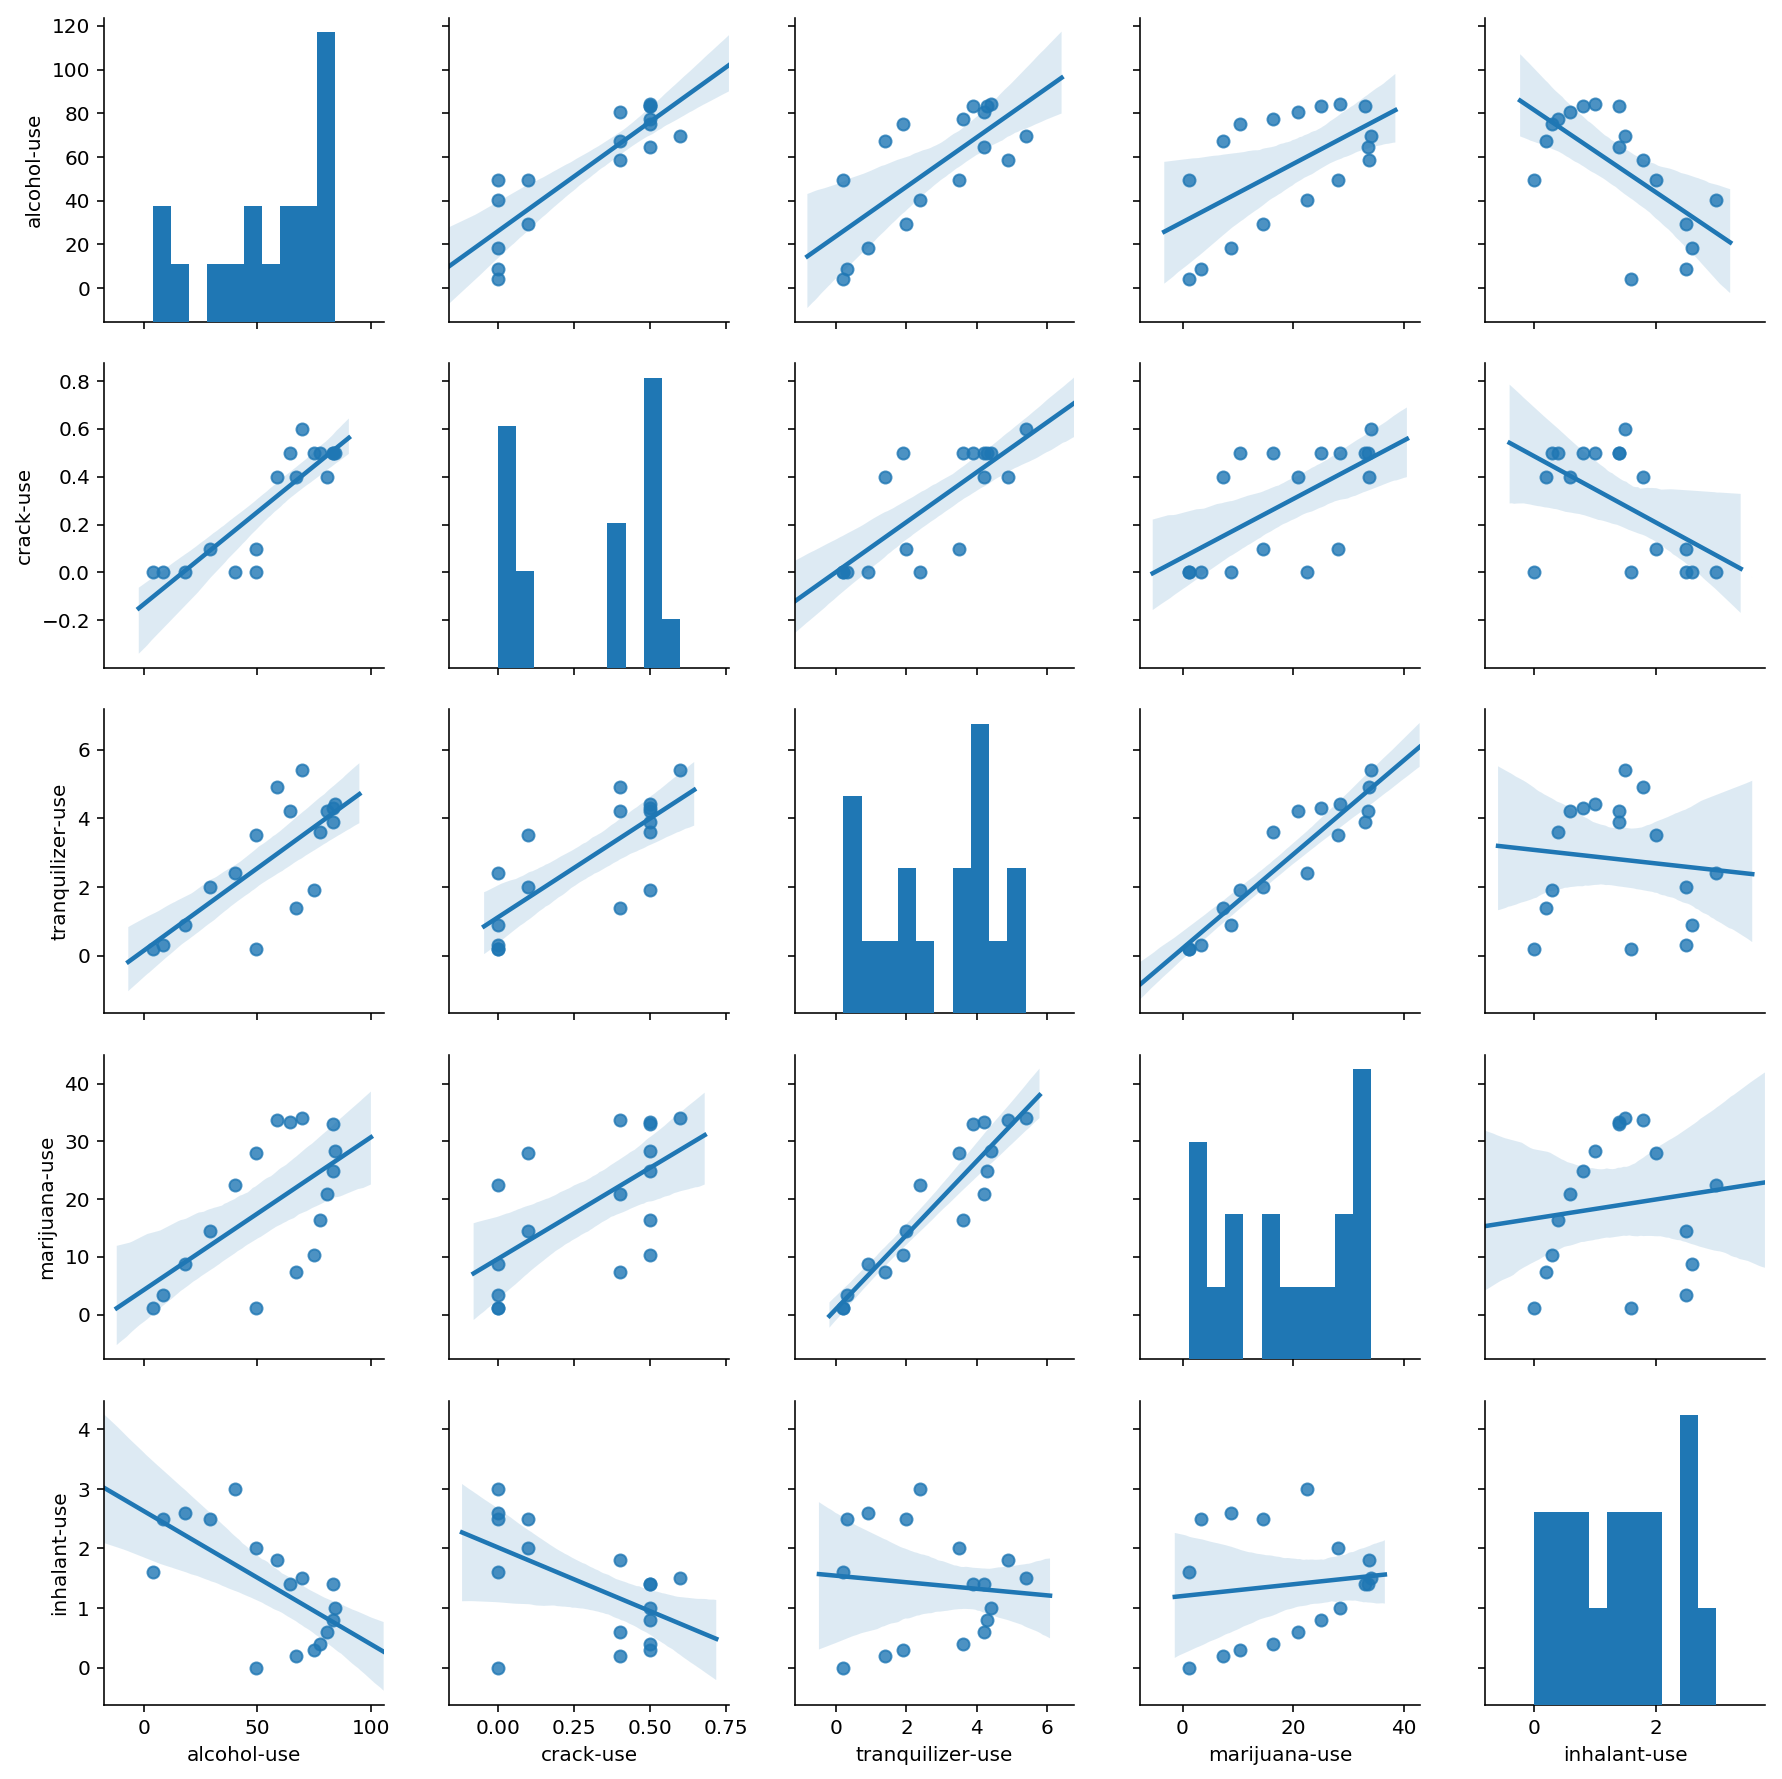

In [395]:
sns.pairplot(exploration_df, kind="reg")
plt.show()

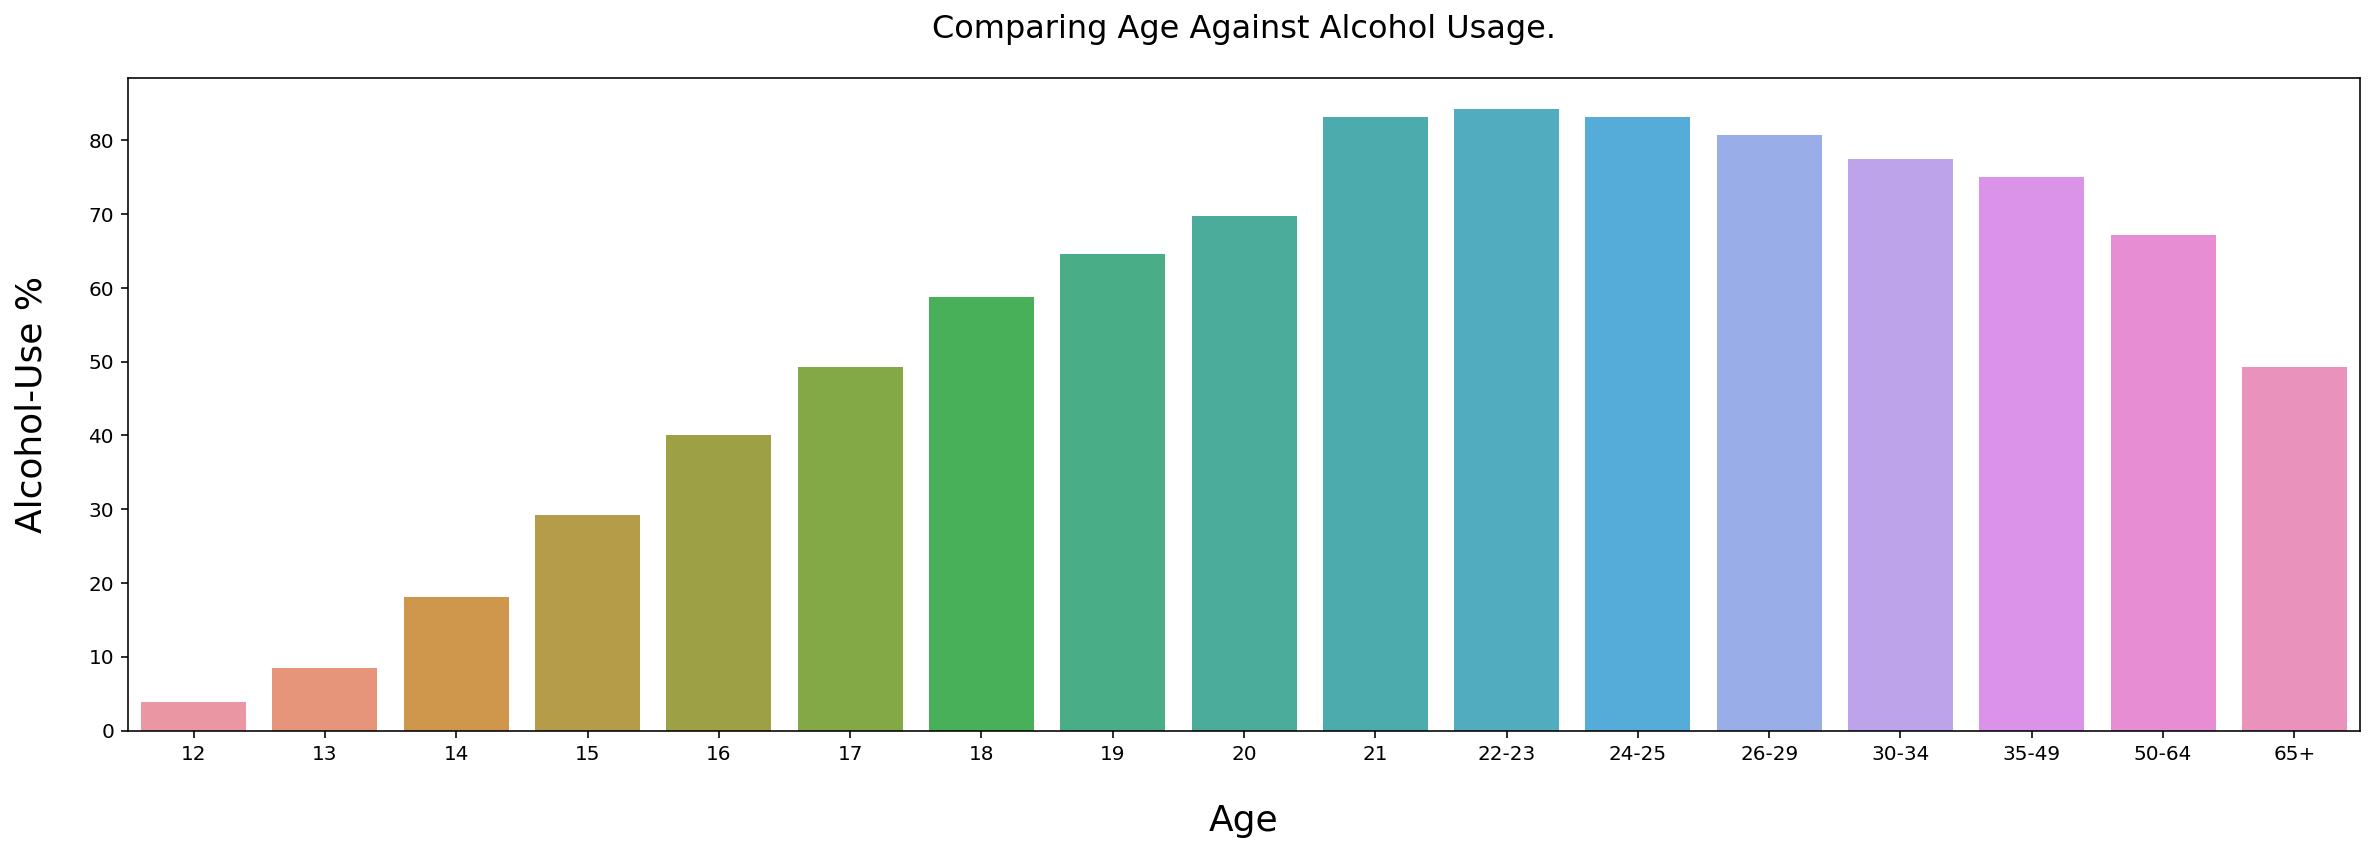

In [396]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Comparing Age Against Alcohol Usage.', fontsize=16, pad=20)
sns.barplot(data=new_df, x='age', y='alcohol-use')
plt.xlabel('Age', fontsize='18', labelpad=20)
plt.ylabel('Alcohol-Use %', fontsize='18', labelpad=20)
plt.show()

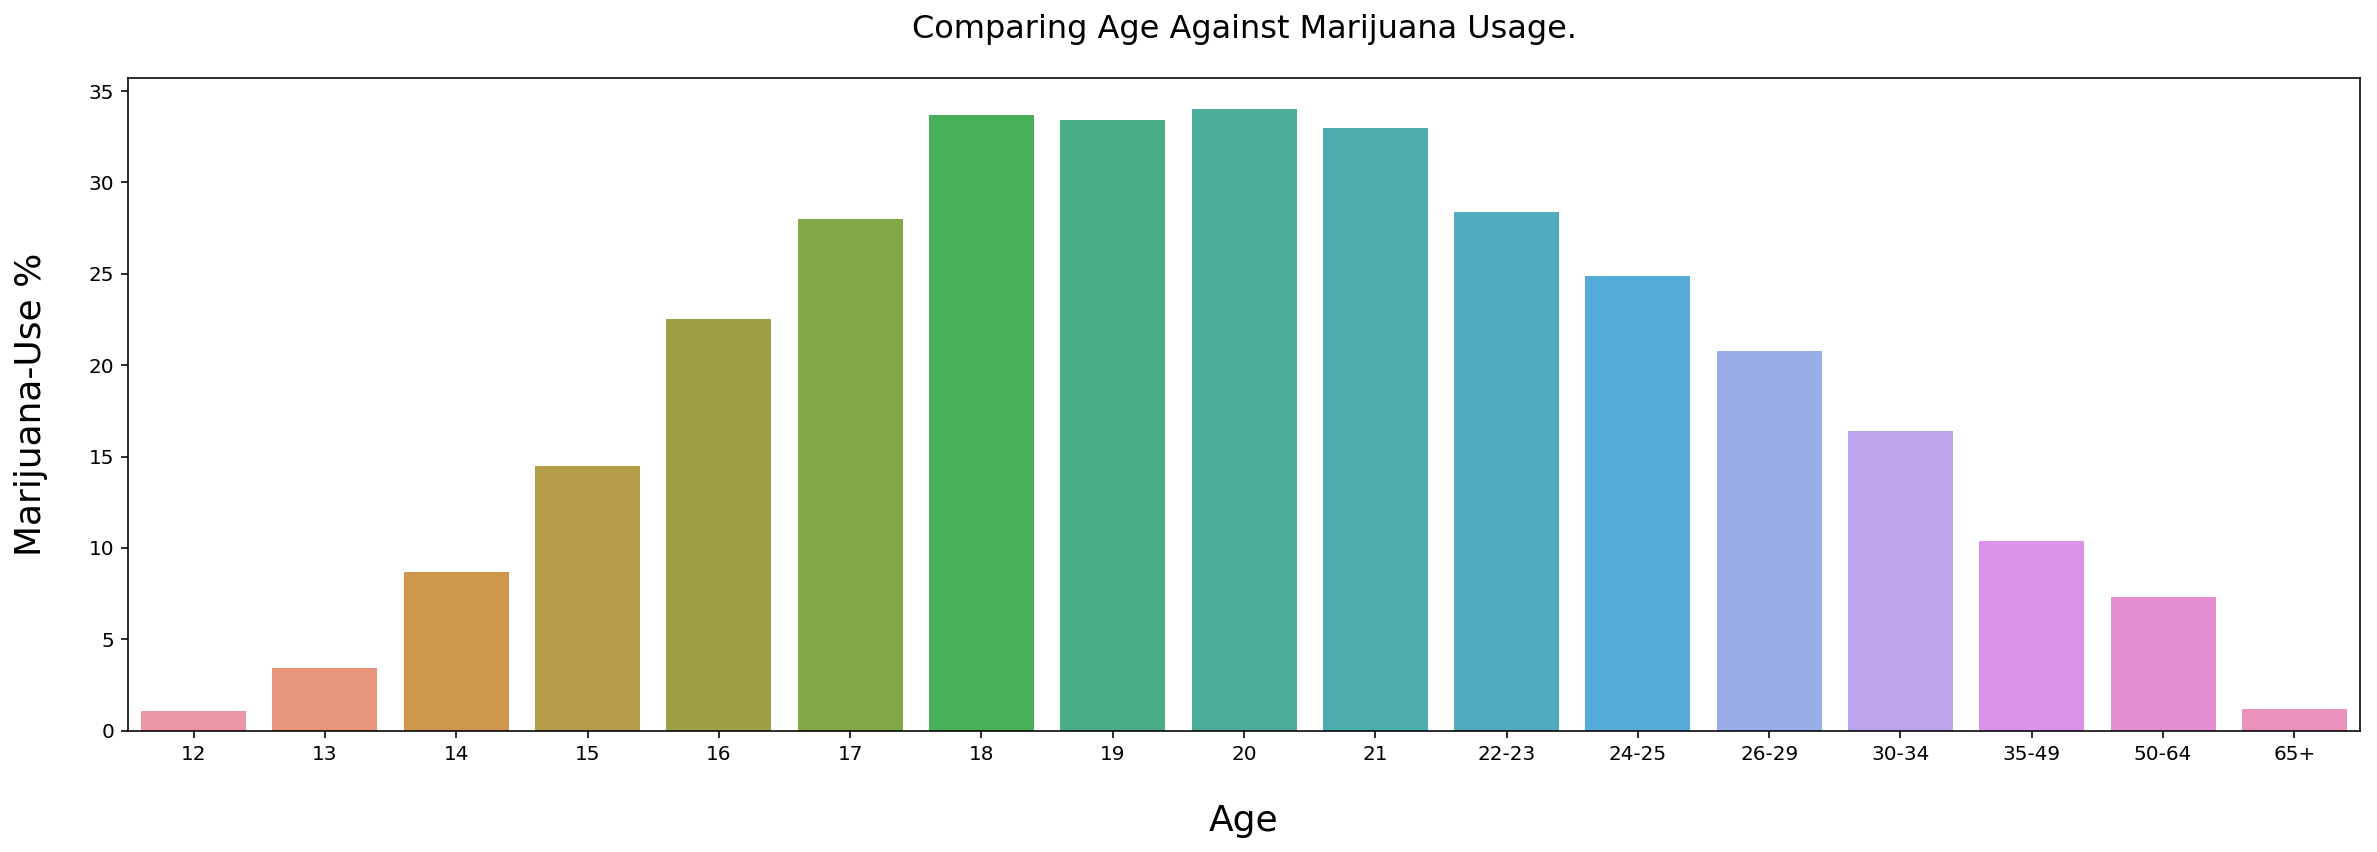

In [397]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Comparing Age Against Marijuana Usage.', fontsize=16, pad=20)
plt.xlabel('Age', fontsize='18', labelpad=20)
plt.ylabel('Marijuana-Use', fontsize='18', labelpad=20)
sns.barplot(data=new_df, x='age', y='marijuana-use')
plt.xlabel('Age', fontsize='18', labelpad=20)
plt.ylabel('Marijuana-Use %', fontsize='18', labelpad=20)
plt.show()

In [398]:
total_study_size = new_df[['n']].sum().sum()
new_df['Study_Size_%'] =  new_df['n'] / total_study_size

1. Marijuana use has a strong positive correlation with cocaine-use, tranquilizer-use and stimulant-use. 
2. The 30 - 34 age group has the highest frequency of drug users. However the highest age group in terms of drug usage % is 20 year olds at 0.04%. From this data we can infer that extremely younger or older age groups (18- and 40-50) consume less take drugs in general.
3. Marijuana-use is most prevalent within the age ranges of: 18, 19, 20 and 21.
4. As the frequency of marijuana increases beyond 48.00 within a group, the alcohol-use % increases significantly. Therefore we can assume that heavy marijuana users are more likely to ingest alcohol. This is also backed by our previous correlation matrix where marijuana-frequency to alcohol-use has a strong positive correlation of 0.9. 
5. Alcohol-use progressively increases with age, also the graph doesn't follow a normal distribution and is negatively skewed, this means that the mean is smaller than the median and a larger proportion of this study is younger and is less likely to consume alcohol.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Which age group is most likely to engage in "class a drugs":
  - 0 - 19 year olds
  - 20 - 29 year olds
  - 30 - 49 year olds

Deliverables:

- 3 Clustered age groups.

- To identify which age group has the largest % of hard drug usage.

- To compare all 3 age groups.


"Hard Drugs" will be classified as any drugs that are Class A drugs by UK law:

- Heroin, Cocaine, Crack-Cocaine, Ecstasy and LSD.

...

In [399]:
#Creating Additional Columns.
new_df['hard_drug_usage_%'] = new_df['cocaine-use'] + new_df['crack-use'] + new_df['heroin-use'] 

In [400]:
#Creating The 3 Age Segments.
youngest_age_group = new_df.iloc[0:8, :][['age','n','cocaine-use', 'cocaine-frequency', 'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency', 'hard_drug_usage_%']]
young_age_group = new_df.iloc[8:13, :][['age','n','cocaine-use', 'cocaine-frequency', 'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency', 'hard_drug_usage_%']]
old_age_group = new_df.iloc[13:15, :][['age','n','cocaine-use', 'cocaine-frequency', 'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency', 'hard_drug_usage_%']]

In [401]:
youngest_age_group.describe()

,n,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hard_drug_usage_%
count,8.000000,8.000000,8.000000,8.000000,6.000000,8.000000,7.000000,8.000000
mean,2761.375000,1.387500,4.750000,0.137500,7.750000,0.187500,56.428571,1.712500
std,287.853106,1.555118,1.732051,0.199553,7.548179,0.172689,60.567062,1.902207
min,2223.000000,0.100000,1.000000,0.000000,1.000000,0.000000,1.000000,0.100000
25%,2685.000000,0.100000,4.750000,0.000000,2.250000,0.100000,18.750000,0.200000
50%,2795.000000,0.750000,5.000000,0.050000,6.250000,0.100000,46.000000,0.950000
75%,2976.500000,2.300000,5.500000,0.175000,9.875000,0.250000,65.250000,2.650000
max,3058.000000,4.100000,7.000000,0.500000,21.000000,0.500000,180.000000,5.100000


In [402]:
youngest_age_group

,age,n,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hard_drug_usage_%
0,12,2798,0.1,5.0,0.0,NaN,0.1,35.5,0.2
1,13,2757,0.1,1.0,0.0,3.0,0.0,NaN,0.1
2,14,2792,0.1,5.5,0.0,NaN,0.1,2.0,0.2
3,15,2956,0.5,4.0,0.1,9.5,0.2,1.0,0.8
4,16,3058,1.0,7.0,0.0,1.0,0.1,66.5,1.1
5,17,3038,2.0,5.0,0.1,21.0,0.1,64.0,2.2
6,18,2469,3.2,5.0,0.4,10.0,0.4,46.0,4.0
7,19,2223,4.1,5.5,0.5,2.0,0.5,180.0,5.1


In [403]:
young_age_group.describe()

,n,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hard_drug_usage_%
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3310.200000,4.280000,5.80000,0.500000,7.800000,0.780000,54.100000,5.560000
std,1229.954349,0.697854,1.30384,0.070711,5.167204,0.216795,21.454603,0.879204
min,2271.000000,3.200000,5.00000,0.400000,5.000000,0.600000,30.000000,4.200000
25%,2354.000000,4.000000,5.00000,0.500000,5.000000,0.600000,45.000000,5.200000
50%,2628.000000,4.500000,5.00000,0.500000,6.000000,0.700000,50.000000,5.900000
75%,4591.000000,4.800000,6.00000,0.500000,6.000000,0.900000,57.500000,6.100000
max,4707.000000,4.900000,8.00000,0.600000,17.000000,1.100000,88.000000,6.400000


In [404]:
old_age_group.describe()

,n,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hard_drug_usage_%
count,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000
mean,5127.500000,1.800000,11.500000,0.5,31.500000,0.250000,173.000000,2.550000
std,3201.072398,0.424264,4.949747,0.0,23.334524,0.212132,151.320851,0.636396
min,2864.000000,1.500000,8.000000,0.5,15.000000,0.100000,66.000000,2.100000
25%,3995.750000,1.650000,9.750000,0.5,23.250000,0.175000,119.500000,2.325000
50%,5127.500000,1.800000,11.500000,0.5,31.500000,0.250000,173.000000,2.550000
75%,6259.250000,1.950000,13.250000,0.5,39.750000,0.325000,226.500000,2.775000
max,7391.000000,2.100000,15.000000,0.5,48.000000,0.400000,280.000000,3.000000


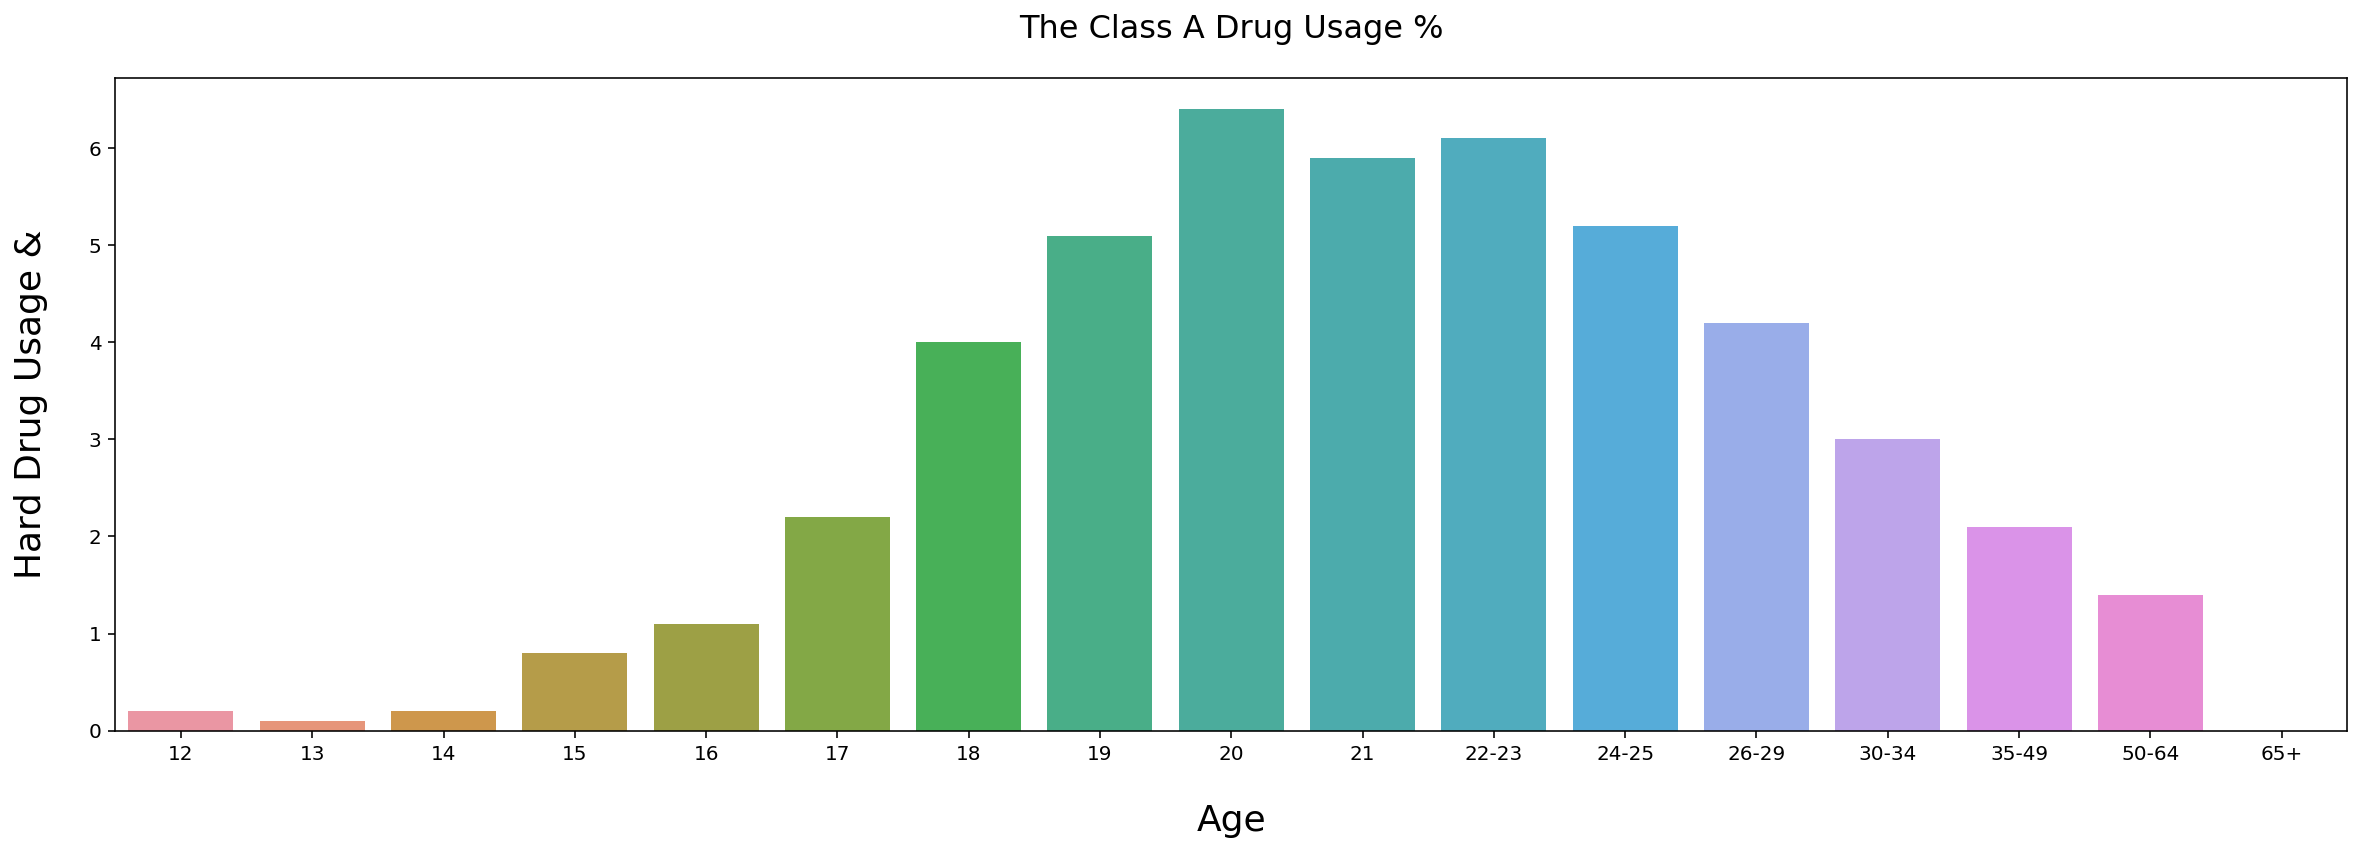

In [405]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=new_df, x='age', y='hard_drug_usage_%')
ax.set_title('The Class A Drug Usage %', fontsize=16, pad=20)
plt.xlabel('Age', fontsize='18', labelpad=20)
plt.ylabel('Hard Drug Usage &', fontsize='18', labelpad=20)
plt.show()

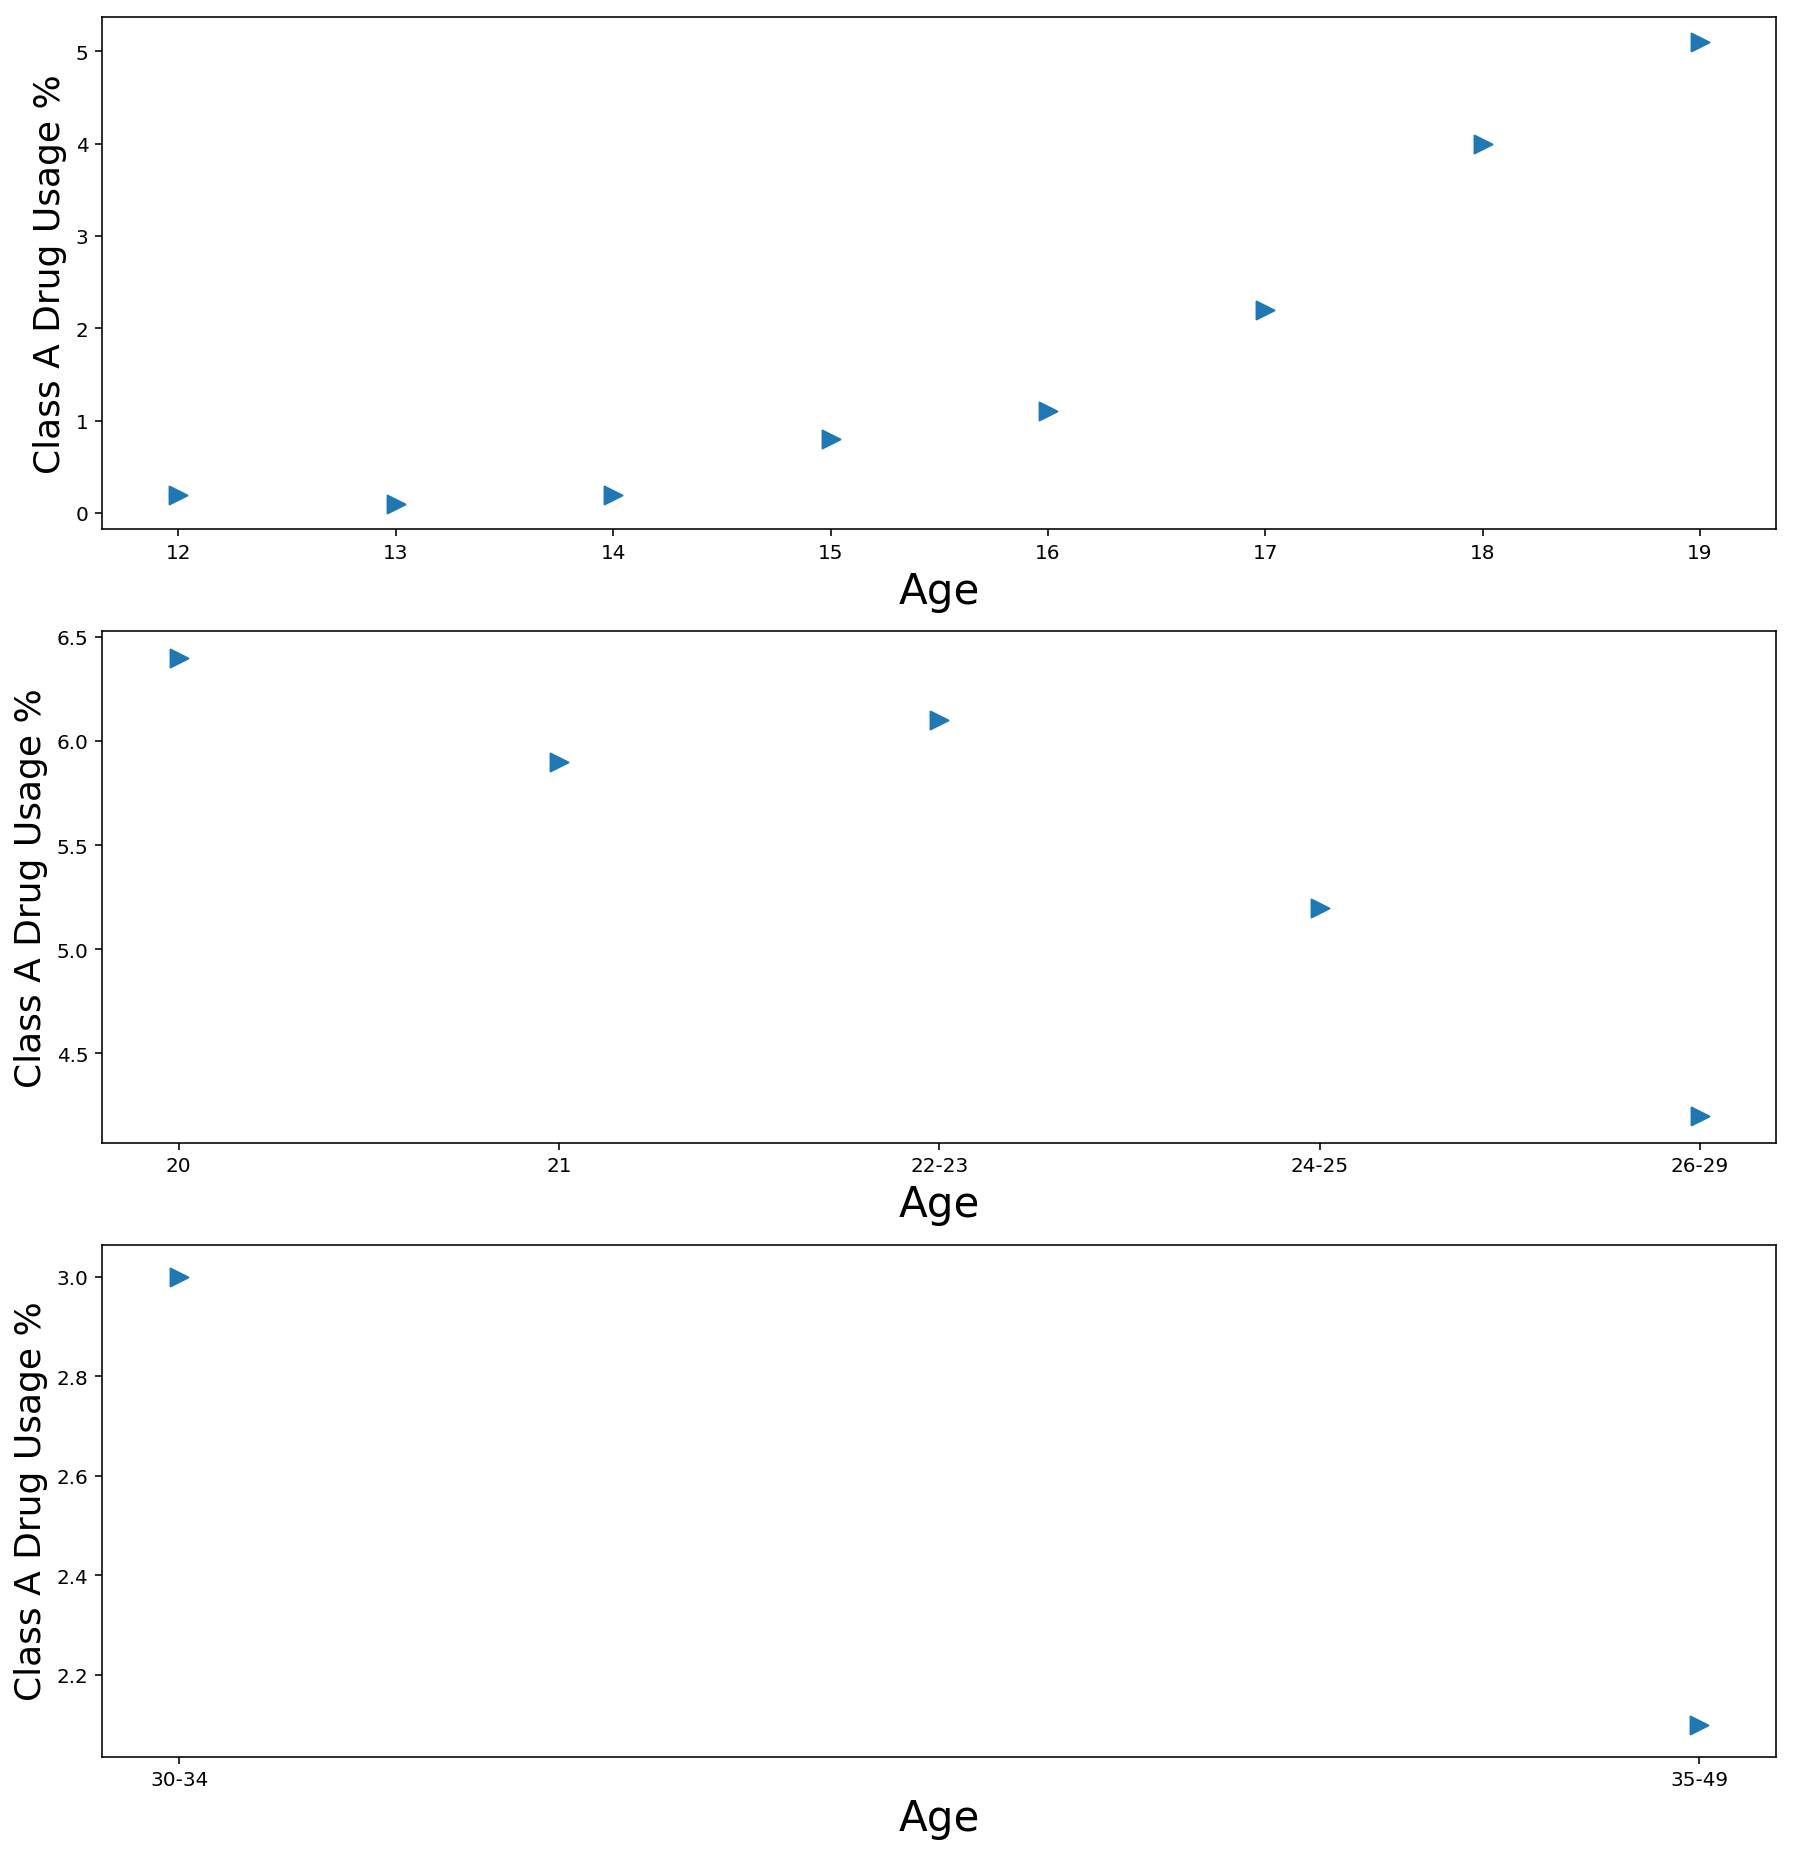

In [407]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15, 16))
#Labelling Axis.
ax[0].set_ylabel('Class A Drug Usage %', fontsize=18)
ax[0].set_xlabel('Age', fontsize=21)
ax[1].set_ylabel('Class A Drug Usage %', fontsize=18)
ax[1].set_xlabel('Age', fontsize=21)
ax[2].set_ylabel('Class A Drug Usage %', fontsize=18)
ax[2].set_xlabel('Age', fontsize=21)

#Plotting Scatter Graphs.
ax[0].scatter(data=youngest_age_group, x='age', y='hard_drug_usage_%', s=80, marker=">")
ax[1].scatter(data=young_age_group, x='age', y='hard_drug_usage_%', s=80, marker=">")
ax[2].scatter(data=old_age_group, x='age', y='hard_drug_usage_%', s=80, marker=">")
plt.show()

In [408]:
new_df[['age','heroin-use']].sort_values(by='heroin-use', ascending=False)

,age,heroin-use
10,22-23,1.1
8,20,0.9
11,24-25,0.7
12,26-29,0.6
9,21,0.6
7,19,0.5
13,30-34,0.4
6,18,0.4
3,15,0.2
15,50-64,0.1


In [409]:
new_df[['age','cocaine-use']].sort_values(by='cocaine-use', ascending=False)

,age,cocaine-use
8,20,4.9
9,21,4.8
10,22-23,4.5
7,19,4.1
11,24-25,4.0
6,18,3.2
12,26-29,3.2
13,30-34,2.1
5,17,2.0
14,35-49,1.5


In [410]:
new_df[['age','crack-use']].sort_values(by='crack-use', ascending=False)

,age,crack-use
8,20,0.6
14,35-49,0.5
7,19,0.5
13,30-34,0.5
9,21,0.5
10,22-23,0.5
11,24-25,0.5
12,26-29,0.4
15,50-64,0.4
6,18,0.4


In [411]:
def Mean(y):
    print(y.mean())

In [412]:
age_clusters = [youngest_age_group[['hard_drug_usage_%']]
                , young_age_group[['hard_drug_usage_%']]
                , old_age_group[['hard_drug_usage_%']]]

for x in age_clusters:
    x.apply(Mean)

1.7125000000000001
5.56
2.55


**Report**

By plotting all of the age ranges, we can see that hard drug usage (class A usage) begins to increase from age 14 and decrease by age 24-25. The shape follows a standard distribution.

The middle group (20-29 year olds) have the highest mean for hard_drug_usage_% at 5.56 when compared to the other two groups (1.71 - 0-19 years and 2.55 30 - 49 year olds).

Furthermore, out of all of the age groups 20 year olds had the largest use for heroin, crack and cocaine.

--- 

Additionally for the 0 - 19 year old group, the crack-use, cocaine-use and heroin-use means are more than their respective medians, therefore we can infer that the distribution is positively skewed. Also cocaine-use within this age group has a moderate standard deviation of 1.55 which indicates that the data points are spread over a wider range of values from the mean, in comparison to the other drug types. 


--- 

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

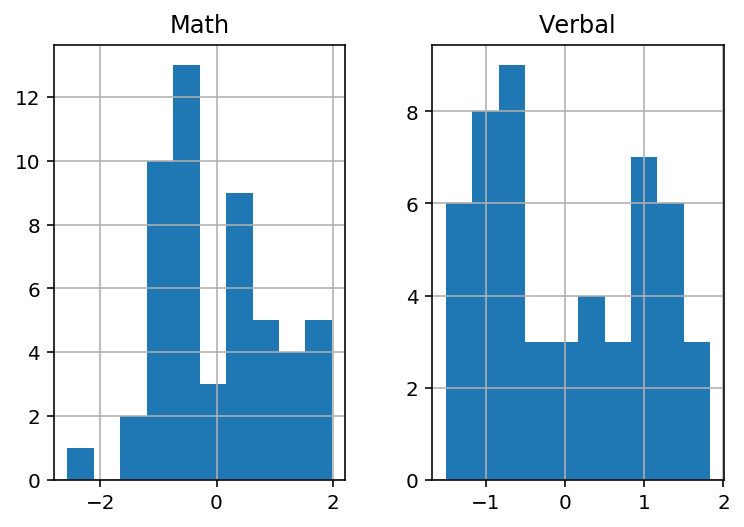

In [413]:
stand_df.hist(['Math', 'Verbal'])
plt.show()

- Outliers are defined by 1.5 x the IQR, 1.5 - 3.0 the standard deviation, from plotting a histogram of both verbal and math scores we can clearly see that there are no outliers. 

In [414]:
[x for x in stand_df['Verbal'] if x > 3 ] 
[x for x in stand_df['Math'] if x > 3 ] 
[x for x in stand_df['Rate'] if x > 3 ] 

[]

For all three standardised series, there are no values that are greater than 3 standard deviations.

In [415]:
Q1 = df_1['Verbal'].describe()['25%']
Q3 = df_1['Verbal'].describe()['75%']

IQR = Q3 - Q1

lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

print(upper_bound)
df_1[(df_1['Verbal'] < lower_bound) | (df_1['Verbal'] > upper_bound)]


653.5


,State,Rate,Verbal,Math,Verbal_Minus_Math


In [416]:
Q1 = df_1['Math'].describe()['25%']
Q3 = df_1['Math'].describe()['75%']

IQR = Q3 - Q1

lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

print(upper_bound)
df_1[(df_1['Math'] < lower_bound) | (df_1['Math'] > upper_bound)]

633.375


,State,Rate,Verbal,Math,Verbal_Minus_Math


In [417]:
Q1 = df_1['Rate'].describe()['25%']
Q3 = df_1['Rate'].describe()['75%']

IQR = Q3 - Q1

lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

print(upper_bound)
df_1[(df_1['Rate'] < lower_bound) | (df_1['Rate'] > upper_bound)]

145.25


,State,Rate,Verbal,Math,Verbal_Minus_Math


### As no list comprehensions or dataframe substes, we can assume that our data doesn't contain any outlier data.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [418]:
df_1[['Verbal','Math']].corr(method='spearman')

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


In [419]:
df_1[['Verbal','Math']].corr(method='pearson')

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


The Spearman correlation is slightly more correlated when compared to Pearson.

Spearman's rank is calculated by ranking both sets of columns, then the difference of both columns is calculated and squared. Then the sum of these squared differences are multiplied by 6 and then divided by n(n**2 - 1). This value is then substracted from 1.


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [420]:
from scipy import stats

In [421]:
df_1['Percentile_rank'] = [stats.percentileofscore(df_1['Rate'], x) for x in df_1['Rate']]

In [422]:
df_1.head(5)

,State,Rate,Verbal,Math,Verbal_Minus_Math,Percentile_rank
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [423]:
df_1[df_1['State'] == 'CA']

,State,Rate,Verbal,Math,Verbal_Minus_Math,Percentile_rank
23,CA,51,498,517,-19,56.730769


The percentiles are linked to spearman's rank because the formula for the sorting algorithim is based upon ordering the columns by their values. Percentile scores are an easy way to sort each of the rows.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

Percentile scoring might be useful for dealing with outliers because it allows us to easily view and segment the data by a percentile range. A classic method for spotting outliers is to use (IQR * 1.5) above and below the IRQ range.

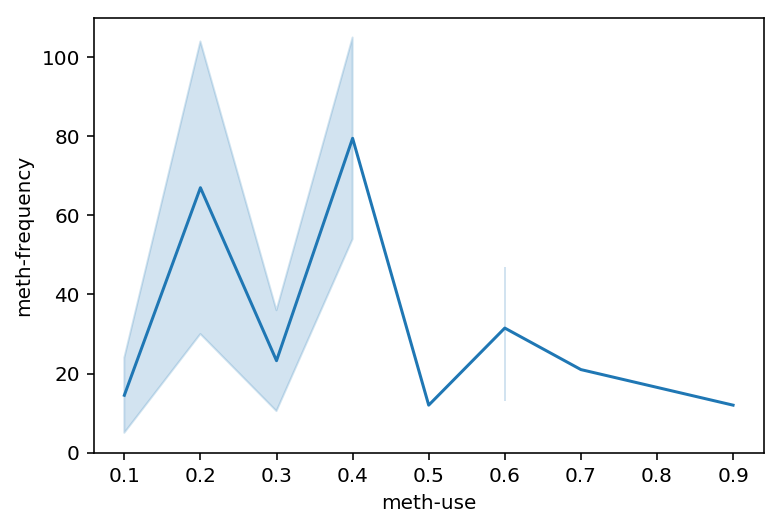

In [424]:
sns.lineplot(x='meth-use', y='meth-frequency', data=new_df)
plt.show()

In [425]:
new_df['Percentile_rank_meth-use'] = [stats.percentileofscore(new_df['meth-use'], x) for x in new_df['meth-use']]

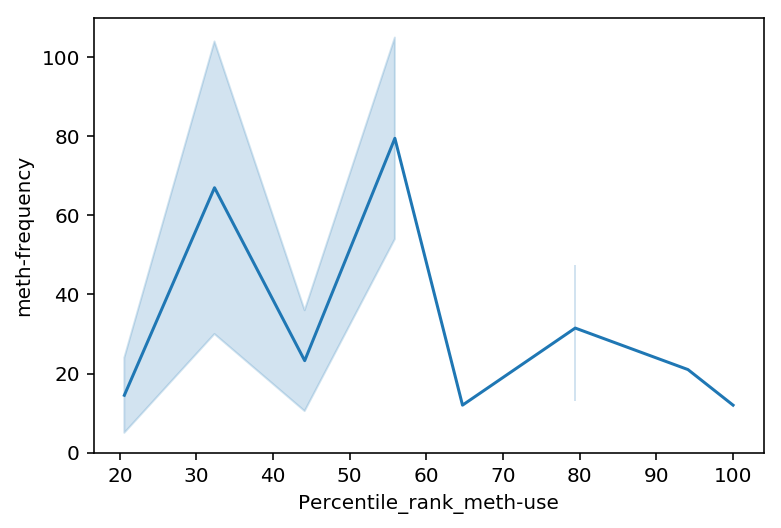

In [426]:
sns.lineplot(x='Percentile_rank_meth-use', y='meth-frequency', data=new_df)
plt.show()

By converting the meth use to a percentile, the graph appears to have a similar shape. However looking at the 70 - 100 percentile's we can see that the increase in frequency is much more pronounced when compared to the other graph.